In [1]:
# Morteza Heidarinejad, Zhe Sun, Jun Igarashi 201808
import matplotlib.pyplot as plt
import matplotlib as mplb
import numpy as np
import pandas as pd
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#start to read density
vM2_layer_size=np.array([1000, 1000, 1366])/1000. # milli
vM2_Layer_Thickness=np.array([128.0, 56.0, 235.0, 107.0, 273.0, 360.0])/1000. # milli
vM2_Layer_Thickness_ST=np.cumsum(vM2_Layer_Thickness)
vM2_Layer_Thickness_ST=np.insert(vM2_Layer_Thickness_ST, 0, 0.0)
print (vM2_Layer_Thickness_ST)
##vM2_Density_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/cell_density/vS1.dat')
vM2_Layer_Cellcont_mm2=np.squeeze(vM2_Density_csv.values)[:-1]
print (vM2_Layer_Cellcont_mm2)
np.savetxt('vM2_Layer_Thickness.csv', vS1_Layer_Thickness, delimiter=',')
np.savetxt('vM2_Layer_Cellcont_mm2.csv', vS1_Layer_Cellcont_mm2, delimiter=',')

[ 0.     0.128  0.184  0.419  0.626  0.733  1.006  1.366]
[  4575.334   3270.034  16693.623  21268.353   5631.072  14903.491
  27734.67 ]


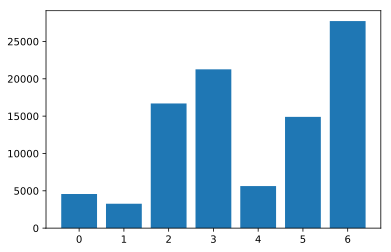

In [3]:
plt.bar(range(7),vM2_Layer_Cellcont_mm2)
plt.savefig('output.eps')

In [4]:
vM2_Layer_Density= [math.pow(vM2_Layer_Cellcont_mm2[0]/(vM2_Layer_Thickness[0]), 1.0/3), \
                   math.pow(vM2_Layer_Cellcont_mm2[1]/(vM2_Layer_Thickness[1]), 1.0/3), \
                   math.pow(vM2_Layer_Cellcont_mm2[2]/(vM2_Layer_Thickness[2]), 1.0/3),\
                   math.pow(vM2_Layer_Cellcont_mm2[3]/(vM2_Layer_Thickness[3]), 1.0/3),\
                   math.pow(vM2_Layer_Cellcont_mm2[4]/(vM2_Layer_Thickness[4]), 1.0/3),\
                   math.pow(vM2_Layer_Cellcont_mm2[5]/(vM2_Layer_Thickness[5]), 1.0/3),]
#vM2_Layer_Density=np.round(vM2_Layer_Density)
#vM2_Layer_Density=vM2_Layer_Density.astype(np.int64)
print (vM2_Layer_Density)

Sub_Region_Architecture=np.zeros((len(vM2_Layer_Density), 3))
for i in range (len(vM2_Layer_Density)):
    Sub_Region_Architecture[i, :]=vM2_Layer_Density[i]
Sub_Region_Architecture[:, 0]=np.round(Sub_Region_Architecture[:, 0]*vM2_layer_size[0]) 
Sub_Region_Architecture[:, 1]=np.round(Sub_Region_Architecture[:, 1]*vM2_layer_size[1]) 
Sub_Region_Architecture[:, 2]=np.round(Sub_Region_Architecture[:, 2]*vM2_Layer_Thickness)  
Sub_Region_Architecture=Sub_Region_Architecture.astype(np.int64)
print (Sub_Region_Architecture)

Layer_name=['L1', 'L2', 'L3', 'L5A', 'L5B', 'L6']

Layer_Neuron_Architecture=[[['IN_SBC', 'IN_ENGC'], [0.203,0.797]],
                      [['EN_PY', 'IN_PV', 'IN_SST', 'IN_VIP'], [0.83, 0.0490926, 0.0196299, 0.1012775]],
                      [['EN_PY', 'IN_PV', 'IN_SST','IN_VIP'], [0.91, 0.0259902, 0.0103923, 0.0536175]],
                      [['EN_PY', 'IN_PV', 'IN_SST','IN_VIP' ], [0.801, 0.01490311, 0.06291186, 0.12118503]],
                      [['EN_PY', 'IN_PV', 'IN_SST','IN_VIP' ], [0.838, 0.07508246, 0.06369742, 0.02322012]],
                      [['EN_PY', 'IN_PV', 'IN_SST','IN_VIP' ], [0.904, 0.04092576, 0.03052532, 0.02454892]],
                      ]


[32.94106311528588, 38.79610092202646, 41.41530967324789, 46.83686716016394, 37.474493142664485, 37.935148417434306, 42.550712244297515]
[[33 33  4]
 [39 39  2]
 [41 41 10]
 [47 47 10]
 [37 37  4]
 [38 38 10]
 [43 43 15]]


In [5]:
Sub_Region_L1={"Name": 'L1',
               "Architecture": Sub_Region_Architecture[0],
               "Size": [vM2_layer_size[0], vM2_layer_size[1], vM2_Layer_Thickness[0]]
              }

Sub_Region_L2={"Name": 'L2',
               "Architecture": Sub_Region_Architecture[1],
               "Size": [vM2_layer_size[0], vM2_layer_size[1],  vM2_Layer_Thickness[1]]
              }

Sub_Region_L3={"Name": 'L3',
               "Architecture": Sub_Region_Architecture[2],
               "Size": [vM2_layer_size[0], vM2_layer_size[1],  vM2_Layer_Thickness[2]]
              }

Sub_Region_L5A={"Name": 'L5A',
               "Architecture":  Sub_Region_Architecture[3],
               "Size": [vM2_layer_size[0], vM2_layer_size[1],  vM2_Layer_Thickness[3]]
              }

Sub_Region_L5B={"Name": 'L5B',
               "Architecture":  Sub_Region_Architecture[4],
               "Size": [vM2_layer_size[0], vM2_layer_size[1],  vM2_Layer_Thickness[4]]
              }

Sub_Region_L6={"Name": 'L6',
               "Architecture":  Sub_Region_Architecture[5],
               "Size": [vM2_layer_size[0], vM2_layer_size[1],  vM2_Layer_Thickness[5]]
              }
Sub_Region_list=[]

Sub_Region_list.append(Sub_Region_L1)
Sub_Region_list.append(Sub_Region_L2)
Sub_Region_list.append(Sub_Region_L3)
Sub_Region_list.append(Sub_Region_L5A)
Sub_Region_list.append(Sub_Region_L5B)
Sub_Region_list.append(Sub_Region_L6)

print (Sub_Region_list)

[{'Name': 'L1', 'Architecture': array([33, 33,  4]), 'Size': [1.0, 1.0, 0.128]}, {'Name': 'L2', 'Architecture': array([39, 39,  2]), 'Size': [1.0, 1.0, 0.056000000000000001]}, {'Name': 'L3', 'Architecture': array([41, 41, 10]), 'Size': [1.0, 1.0, 0.056000000000000001]}, {'Name': 'L4', 'Architecture': array([47, 47, 10]), 'Size': [1.0, 1.0, 0.23499999999999999]}, {'Name': 'L5A', 'Architecture': array([37, 37,  4]), 'Size': [1.0, 1.0, 0.20699999999999999]}, {'Name': 'L5B', 'Architecture': array([38, 38, 10]), 'Size': [1.0, 1.0, 0.107]}, {'Name': 'L6', 'Architecture': array([43, 43, 15]), 'Size': [1.0, 1.0, 0.27300000000000002]}]


In [6]:
for l in range (len(Layer_name)):
    Sub_Region=Sub_Region_list[l]
    print ('start to preprocess layer: '+Sub_Region['Name'])
    Layer_architecture=Sub_Region['Architecture']
    Layer_size=Sub_Region['Size']
    print (Layer_architecture)
    Neuron_numbers=Layer_architecture[0]*Layer_architecture[1]*Layer_architecture[2]
    
    Neuron_pos_x=np.linspace(0.0, Layer_size[0], num=Layer_architecture[0], endpoint=True)
    Neuron_pos_y=np.linspace(0.0, Layer_size[1], num=Layer_architecture[1], endpoint=True)
    Neuron_pos_z=np.linspace(vM2_Layer_Thickness_ST[l], vM2_Layer_Thickness_ST[l+1] , num=Layer_architecture[2], endpoint=False)
    Neuron_pos=np.zeros((Layer_architecture[0],Layer_architecture[1] , Layer_architecture[2], 4))
    print (Layer_Neuron_Architecture[l][1])
    Neuron_type=np.random.choice(range (len (Layer_Neuron_Architecture[l][0])),size= Sub_Region_Architecture[l], p=Layer_Neuron_Architecture[l][1])
    py_index=0
    for i in range (Layer_architecture[0]):
        for j in range (Layer_architecture[1]):
            for k in range (Layer_architecture[2]):
                #print (i, j, k)
                #print (L1_architecture[1]*i+L1_architecture[2]*j+k)
                Neuron_pos[ i, j,k,  :3]=np.array([Neuron_pos_x[i], Neuron_pos_y[j], Neuron_pos_z[k]])
                Neuron_pos[ i, j,k, 3]=Neuron_type[i, j, k]
    print(Neuron_pos)
    np.savez('vM2_Neuron_pos_'+Layer_name[l], Neuron_pos = Neuron_pos)
    #np.savez('vS1_structure', vM2_Layer_Thickness=vM2_Layer_Thickness, Sub_Region_Architecture=Sub_Region_Architecture)

start to preprocess layer: L1
[33 33  4]
[0.203, 0.797]
[[[[ 0.       0.       0.       1.     ]
   [ 0.       0.       0.032    1.     ]
   [ 0.       0.       0.064    1.     ]
   [ 0.       0.       0.096    1.     ]]

  [[ 0.       0.03125  0.       1.     ]
   [ 0.       0.03125  0.032    1.     ]
   [ 0.       0.03125  0.064    1.     ]
   [ 0.       0.03125  0.096    1.     ]]

  [[ 0.       0.0625   0.       1.     ]
   [ 0.       0.0625   0.032    1.     ]
   [ 0.       0.0625   0.064    1.     ]
   [ 0.       0.0625   0.096    0.     ]]

  ..., 
  [[ 0.       0.9375   0.       1.     ]
   [ 0.       0.9375   0.032    1.     ]
   [ 0.       0.9375   0.064    1.     ]
   [ 0.       0.9375   0.096    1.     ]]

  [[ 0.       0.96875  0.       1.     ]
   [ 0.       0.96875  0.032    1.     ]
   [ 0.       0.96875  0.064    1.     ]
   [ 0.       0.96875  0.096    1.     ]]

  [[ 0.       1.       0.       1.     ]
   [ 0.       1.       0.032    1.     ]
   [ 0.       1.       0

[[[[ 0.          0.          0.419       0.        ]
   [ 0.          0.          0.4397      0.        ]
   [ 0.          0.          0.4604      0.        ]
   ..., 
   [ 0.          0.          0.5639      0.        ]
   [ 0.          0.          0.5846      0.        ]
   [ 0.          0.          0.6053      0.        ]]

  [[ 0.          0.02173913  0.419       0.        ]
   [ 0.          0.02173913  0.4397      0.        ]
   [ 0.          0.02173913  0.4604      0.        ]
   ..., 
   [ 0.          0.02173913  0.5639      0.        ]
   [ 0.          0.02173913  0.5846      0.        ]
   [ 0.          0.02173913  0.6053      0.        ]]

  [[ 0.          0.04347826  0.419       0.        ]
   [ 0.          0.04347826  0.4397      0.        ]
   [ 0.          0.04347826  0.4604      0.        ]
   ..., 
   [ 0.          0.04347826  0.5639      3.        ]
   [ 0.          0.04347826  0.5846      0.        ]
   [ 0.          0.04347826  0.6053      0.        ]]

  ..., 
  [[ 

In [7]:
#L2, L3, l4, l5A, L5B, L6
SubRegion_external_connection_matrix_E2E=np.zeros((6,6,2))
SubRegion_external_connection_matrix_I2E=np.zeros((20,6,2))
SubRegion_external_connection_matrix_E2I=np.zeros((6,20,2))
SubRegion_external_connection_matrix_I2I=np.zeros((20,20,2))

In [8]:
#E2E connections
##coefficients_fitting_model_layer_L2_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L2/fitted_model_cell_density_canceled_out_layer_coefficients.dat')
##coefficients_fitting_model_layer_L3_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L3/fitted_model_cell_density_canceled_out_layer_coefficients.dat')
##coefficients_fitting_model_layer_L5A_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L5A/fitted_model_cell_density_canceled_out_layer_coefficients.dat')
##coefficients_fitting_model_layer_L5B_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L5B1/fitted_model_cell_density_canceled_out_layer_coefficients.dat')
##coefficients_fitting_model_layer_L6_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L6/fitted_model_cell_density_canceled_out_layer_coefficients.dat')

In [9]:
coefficients_fitting_model_layer_L2_csv.columns[1]
coefficients_fitting_model_layer_L2_csv

,layer,coefficient0(peak),ecofficient1(sigma),mean of coefficient0 by row
0,L2,0.378844,359.551671,0.216227
1,L3,0.173459,470.927675,0.120142
2,L4,0.069028,587.889919,0.053741
3,L5A,0.128113,696.184754,0.106562
4,L5B,0.102547,972.728458,0.092973
5,L6,0.049149,2680.976477,0.048497


In [10]:
SubRegion_external_connection_matrix_E2E[:, 0, 0]=coefficients_fitting_model_layer_L2_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, 0, 1]=coefficients_fitting_model_layer_L2_csv.loc[:, ' ecofficient1(sigma)'].values

SubRegion_external_connection_matrix_E2E[:, 1, 0]=coefficients_fitting_model_layer_L3_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, 1, 1]=coefficients_fitting_model_layer_L3_csv.loc[:, ' ecofficient1(sigma)'].values

SubRegion_external_connection_matrix_E2E[:, 3, 0]=coefficients_fitting_model_layer_L5A_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, 3, 1]=coefficients_fitting_model_layer_L5A_csv.loc[:, ' ecofficient1(sigma)'].values

SubRegion_external_connection_matrix_E2E[:, 4, 0]=coefficients_fitting_model_layer_L5B_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, 4, 1]=coefficients_fitting_model_layer_L5B_csv.loc[:, ' ecofficient1(sigma)'].values

SubRegion_external_connection_matrix_E2E[:, 5, 0]=coefficients_fitting_model_layer_L6_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, 5, 1]=coefficients_fitting_model_layer_L6_csv.loc[:, ' ecofficient1(sigma)'].values

print (SubRegion_external_connection_matrix_E2E)

[[[  3.78843713e-01   3.59551671e+02]
  [  2.14542670e-01   4.14768036e+02]
  [  7.56344135e-02   1.24563930e+03]
  [  2.08057043e-01   3.95355080e+02]
  [  2.55376630e-01   4.09167005e+02]
  [  6.48343898e-02   2.15907852e+03]]

 [[  1.73458997e-01   4.70927675e+02]
  [  2.40747380e-01   3.65311999e+02]
  [  7.48067190e-02   7.83371434e+02]
  [  1.41465997e-01   4.54176754e+02]
  [  2.15937612e-01   3.97393743e+02]
  [  5.80394973e-02   1.51192602e+03]]

 [[  6.90279786e-02   5.87889919e+02]
  [  3.16043652e-01   2.54965670e+02]
  [  8.65645457e-02   4.77430484e+02]
  [  8.08047699e-02   5.14946997e+02]
  [  1.68474409e-01   2.98060181e+02]
  [  5.02320880e-02   8.36054639e+02]]

 [[  1.28112655e-01   6.96184754e+02]
  [  2.26068782e-01   4.08490811e+02]
  [  9.86304760e-02   8.59595662e+02]
  [  1.12199664e-01   9.30369793e+02]
  [  1.56730928e-01   6.52999509e+02]
  [  9.10346738e-02   8.66898918e+02]]

 [[  1.02546938e-01   9.72728458e+02]
  [  1.33607411e-01   6.82646953e+02]
  [ 

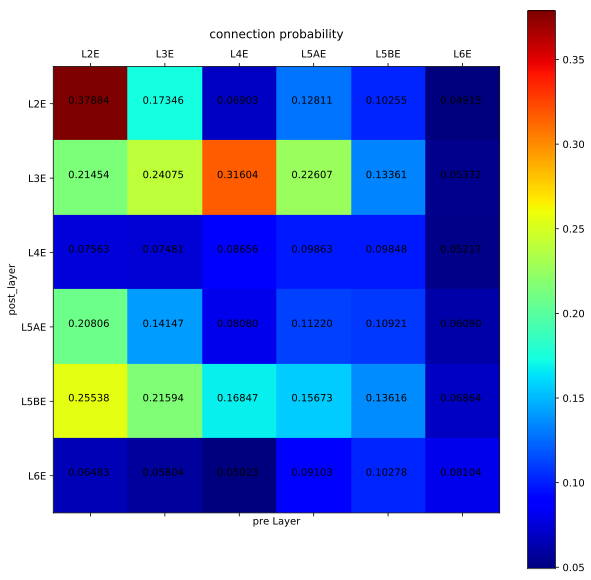

In [11]:
plt.figure(figsize=(10,10))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_E2E[:,:,0])), fignum=1, cmap=plt.cm.jet)
for i in range (SubRegion_external_connection_matrix_E2E.shape[0]):
    for j in range (SubRegion_external_connection_matrix_E2E.shape[1]):
        plt.text(i-0.3, j, '%.5f' %SubRegion_external_connection_matrix_E2E[i,j,0])
plt.title('connection probability')
scale_ls = range(5)  
index_ls=['L2E', 'L3E',  'L5AE',  'L5BE', 'L6E']
_ = plt.xticks(scale_ls, index_ls)
_ = plt.yticks(scale_ls, index_ls)

plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.colorbar()

In [12]:
def normalize_matrix_E2E(mat):
    mat_min=np.min(mat[:,:,0])
    mat_max=np.max(mat[:,:,0])
    mat[:,:,0]=0.25*(mat[:,:,0]-mat_min)/(mat_max-mat_min)
    return mat
def normalize_matrix_I(mat):
    mat_min=np.min(mat[:,:,0])
    mat_max=np.max(mat[:,:,0])
    mat[:,:,0]=(mat[:,:,0]-mat_min)/(mat_max-mat_min)
    return mat
SubRegion_external_connection_matrix_E2E=normalize_matrix_E2E(SubRegion_external_connection_matrix_E2E)

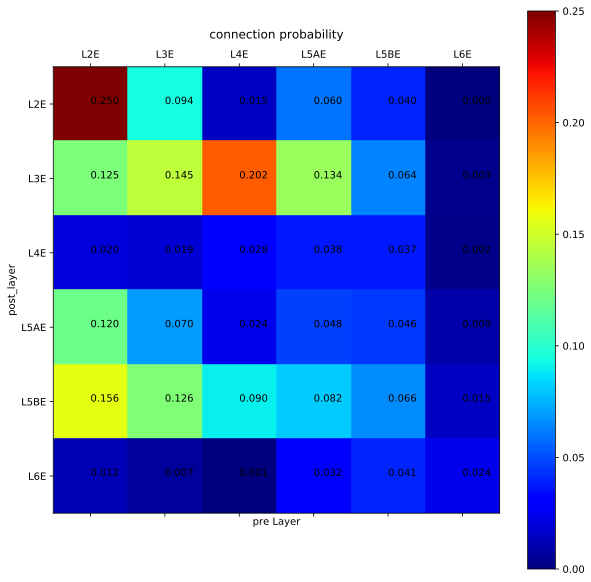

In [13]:
plt.figure(figsize=(10,10))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_E2E[:,:,0])), fignum=1, cmap=plt.cm.jet)
for i in range (SubRegion_external_connection_matrix_E2E.shape[0]):
    for j in range (SubRegion_external_connection_matrix_E2E.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_E2E[i,j,0])
plt.title('connection probability')

scale_ls = range(5)  
index_ls=['L2E','L3E',  'L5AE',  'L5BE', 'L6E']
_ = plt.xticks(scale_ls, index_ls)
_ = plt.yticks(scale_ls, index_ls)

plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.colorbar()

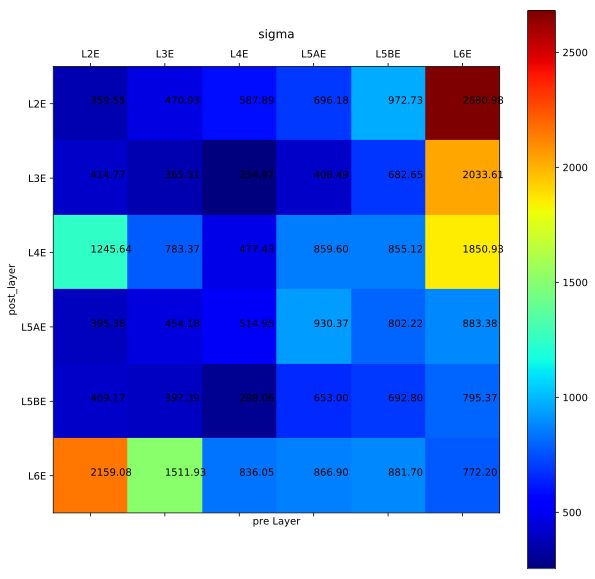

In [14]:
plt.figure(figsize=(10,10))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_E2E[:,:,1])), fignum=1, cmap=plt.cm.jet)
for i in range (SubRegion_external_connection_matrix_E2E.shape[0]):
    for j in range (SubRegion_external_connection_matrix_E2E.shape[1]):
        plt.text(i, j, '%.2f' %SubRegion_external_connection_matrix_E2E[i,j,1])
plt.title('sigma')

scale_ls = range(5)  
index_ls=[ 'L2E','L3E',  'L5AE',  'L5BE', 'L6E']
_ = plt.xticks(scale_ls, index_ls)
_ = plt.yticks(scale_ls, index_ls)

plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.colorbar()

In [15]:
##M2_fitted_model_coefficients=pd.read_csv('180202_meso/data_extraction_from_experimental_papers/data/extracted_data/i_to_e_Katzel_10_fig4/S1_fitted_model_coefficients.dat').values
##M2_normalized_original_matrix_cell_density_canceled_out=pd.read_csv('180202_meso/data_extraction_from_experimental_papers/data/extracted_data/i_to_e_Katzel_10_fig4/S1_normalized_original_matrix_cell_density_canceled_out.dat').values

In [16]:
M2_fitted_model_coefficients

array([[   0.        ,    5.55240698,  116.05676068],
       [   1.        ,    4.02767031,   81.14954554],
       [   2.        ,    5.28420221,  148.33935593],
       [   3.        ,    5.40610723,  142.78758871],
       [   4.        ,    5.13434884,  176.45714296]])

In [17]:
SubRegion_external_connection_matrix_I2E[2:,0,1]=M2_fitted_model_coefficients[0,2]
SubRegion_external_connection_matrix_I2E[2:,1,1]=M2_fitted_model_coefficients[0,2]
SubRegion_external_connection_matrix_I2E[2:,2,1]=M2_fitted_model_coefficients[1,2]
SubRegion_external_connection_matrix_I2E[2:,3,1]=M2_fitted_model_coefficients[2,2]
SubRegion_external_connection_matrix_I2E[2:,4,1]=M2_fitted_model_coefficients[3,2]
SubRegion_external_connection_matrix_I2E[2:,5,1]=M2_fitted_model_coefficients[4,2]
SubRegion_external_connection_matrix_I2E.shape

(20, 6, 2)

In [18]:
print (M2_normalized_original_matrix_cell_density_canceled_out.shape)
print (M2_normalized_original_matrix_cell_density_canceled_out)

(36, 3)
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   1.95905430e-02]
 [  1.00000000e+00   1.00000000e+00   1.73710910e-01]
 [  2.00000000e+00   1.00000000e+00   4.32663643e-01]
 [  3.00000000e+00   1.00000000e+00   7.45430219e-02]
 [  4.00000000e+00   1.00000000e+00   4.43535115e-02]
 [  5.00000000e+00   1.00000000e+00   8.17757009e-03]
 [  0.00000000e+00   2.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   2.00000000e+00   1.07936876e-02]
 [  2.00000000e+00   2.00000000e+00   7.87135062e-01]
 [  3.00000000e+00   2.00000000e+00   5.69721668e-01]
 [  4.00000000e+00   2.00000000e+00   4.11081326e-02]
 [  5.00000000e+00   2.00000000e+00   5.84112150e-03]
 [  0.00000000e+00  

In [19]:
##ENGC_to_L2_3I=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_L2_3I.dat').values[0]
##ENGC_to_L2_3P=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_L2_3P.dat').values[0]
##ENGC_to_L5P=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_L5P.dat').values[0]

##SBC_to_L23_MAC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/SBC_to_L23_MAC.dat').values[0]
##ENGC_to_L23_MAC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_L23_MAC.dat').values[0]
##SBC_to_L23_P=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/SBC_to_L23_P.dat').values[0]
##L23P_to_SBC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L23P_to_SBC.dat').values[0][0]

SBC_to_L5P=[0.0, 0.0]
##I_to_L2_3I=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/I_to_L2_3I.dat').values[0]
##L2_3_Mac_to_ENGC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L2_3_Mac_to_ENGC.dat').values[0][0]
##L2_3_Mac_to_SBC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L2_3_Mac_to_SBC.dat').values[0][0]
##L2_3I_to_L5P=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L2_3I_to_L5P.dat').values[0]
##SBC_to_L2_3I=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/SBC_to_L2_3I.dat').values[0]

##L5MC_to_SBC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L5MC_to_SBC.dat').values[0][0]
##L5MC_to_ENGC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L5MC_to_ENGC.dat').values[0][0]

##L5P_to_ENGC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L5P_to_ENGC.dat').values[0][0]

##SBC_to_SBC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/SBC_to_SBC.dat').values[0][0]

##ENGC_to_ENGC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_ENGC.dat').values[0][0]
##ENGC_to_SBC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_SBC.dat').values[0][0]

In [20]:
print (ENGC_to_L2_3I)
print (ENGC_to_L2_3P)
print (ENGC_to_L5P)

#print (SBC_to_L23_MAC)
#print (ENGC_to_L23_MAC)

print (SBC_to_L2_3I)
print (SBC_to_L5P)

#print (I_to_L2_3I)

print (    L2_3_Mac_to_SBC)
print (    L2_3_Mac_to_ENGC)
print (    SBC_to_SBC)
print (    ENGC_to_ENGC)
print (    ENGC_to_SBC)
print (    L5P_to_ENGC)
print (    L23P_to_SBC)
print (    L5MC_to_SBC)
print (   L5MC_to_ENGC)

[   0.35502725  238.79485576]
[   0.64947291  213.49049057]
[   0.2574876   184.82160165]
[  0.69452163  34.34989962]
[0.0, 0.0]
0.738890883252
1.03332202201
0.106895381587
1.23023456704
1.03144666444
0.031881078719
0.0262550060039
0.523224762506
0.478216180785


In [21]:
#pre : SBC, ENGC, L2I, L3I L5AI, L5BI
SubRegion_L1_connection_matrix_I2I=np.zeros((8,8,2))
#pre :  SBC, ENGC, L2pyr,L3pyr, L5Apyr, L5Bpyr
SubRegion_L1_connection_matrix_I2E=np.zeros((8,8,2))

#sbc to sbc 
SubRegion_L1_connection_matrix_I2I[0,0,0]=SBC_to_SBC
SubRegion_L1_connection_matrix_I2I[0,0,1]=SBC_to_L23_MAC[1]

#engc to sbc 
SubRegion_L1_connection_matrix_I2I[1,0,0]=ENGC_to_SBC
SubRegion_L1_connection_matrix_I2I[1,0,1]=M2_fitted_model_coefficients[0,2]

#L2I to sbc 
SubRegion_L1_connection_matrix_I2I[2,0,0]=L2_3_Mac_to_SBC
SubRegion_L1_connection_matrix_I2I[2,0,1]=M2_fitted_model_coefficients[0,2]

#L3I to sbc 
SubRegion_L1_connection_matrix_I2I[3,0,0]=L2_3_Mac_to_SBC
SubRegion_L1_connection_matrix_I2I[3,0,1]=M2_fitted_model_coefficients[0,2]

#L5AI to sbc
SubRegion_L1_connection_matrix_I2I[5,0,0]=L5MC_to_SBC
SubRegion_L1_connection_matrix_I2I[5,0,1]=M2_fitted_model_coefficients[2,2]

#L5BI to sbc
SubRegion_L1_connection_matrix_I2I[6,0,0]=L5MC_to_SBC
SubRegion_L1_connection_matrix_I2I[6,0,1]=M2_fitted_model_coefficients[3,2]

#sbc to engc 0
#SubRegio_L1_connection_matrix_I2I[0,1,0]=
#SubRegio_L1_connection_matrix_I2I[0,1,1]=

#engc to engc 
SubRegion_L1_connection_matrix_I2I[1,1,0]=ENGC_to_ENGC
SubRegion_L1_connection_matrix_I2I[1,1,1]=M2_fitted_model_coefficients[0,2]

#L2I to engc 
SubRegion_L1_connection_matrix_I2I[2,1,0]=L2_3_Mac_to_ENGC
SubRegion_L1_connection_matrix_I2I[2,1,1]=M2_fitted_model_coefficients[0,2]

#L3I to engc 
SubRegion_L1_connection_matrix_I2I[3,1,0]=L2_3_Mac_to_ENGC
SubRegion_L1_connection_matrix_I2I[3,1,1]=M2_fitted_model_coefficients[0,2]

#L5AI to engc 
SubRegion_L1_connection_matrix_I2I[5,1,0]=L5MC_to_ENGC
SubRegion_L1_connection_matrix_I2I[5,1,1]=M2_fitted_model_coefficients[2,2]

#L5BI to engc 
SubRegion_L1_connection_matrix_I2I[6,1,0]=L5MC_to_ENGC
SubRegion_L1_connection_matrix_I2I[6,1,1]=M2_fitted_model_coefficients[3,2]

#SBC to L2I 
SubRegion_L1_connection_matrix_I2I[0,2,:]=SBC_to_L2_3I
#SubRegio_L1_connection_matrix_I2I[0,1,1]=S1_fitted_model_coefficients[3,2]

#SBC to L3I 
SubRegion_L1_connection_matrix_I2I[0,3,:]=SBC_to_L2_3I
#SubRegio_L1_connection_matrix_I2I[0,1,1]=S1_fitted_model_coefficients[3,2]

#ENGC to L2I 
SubRegion_L1_connection_matrix_I2I[1,2,:]=ENGC_to_L2_3I
#SubRegio_L1_connection_matrix_I2I[0,1,1]=S1_fitted_model_coefficients[3,2]

#ENGC to L3I 
SubRegion_L1_connection_matrix_I2I[1,3,:]=ENGC_to_L2_3I
#SubRegio_L1_connection_matrix_I2I[0,1,1]=S1_fitted_model_coefficients[3,2]

#L23I to L23I 
#SubRegio_L1_connection_matrix_I2I[1,2,:]=ENGC_to_L2_3I
#SubRegio_L1_connection_matrix_I2I[0,1,1]=S1_fitted_model_coefficients[3,2]

#L5AI to L5AI 
#SubRegio_L1_connection_matrix_I2I[1,2,:]=ENGC_to_L2_3I
#SubRegio_L1_connection_matrix_I2I[0,1,1]=S1_fitted_model_coefficients[3,2]

#L5BI to L5BI 
#SubRegio_L1_connection_matrix_I2I[1,2,:]=ENGC_to_L2_3I
#SubRegio_L1_connection_matrix_I2I[0,1,1]=S1_fitted_model_coefficients[3,2]

In [22]:
SubRegion_L1_connection_matrix_I2E[0:2, 0:2, :]=SubRegion_L1_connection_matrix_I2I[0:2, 0:2, :]

#L2P to SBC
SubRegion_L1_connection_matrix_I2E[2, 0, 0]=L23P_to_SBC
SubRegion_L1_connection_matrix_I2E[2, 0, 1]=SubRegion_external_connection_matrix_E2E[0, 0, 1]

#L3P to SBC
SubRegion_L1_connection_matrix_I2E[3, 0, 0]=L23P_to_SBC
SubRegion_L1_connection_matrix_I2E[3, 0, 1]=SubRegion_external_connection_matrix_E2E[1, 1, 1]

#L5AP to SBC
#SubRegio_L1_connection_matrix_I2E[3, 0, 0]=L23P_to_SBC
#SubRegio_L1_connection_matrix_I2E[3, 0, 1]=SubRegion_external_connection_matrix_E2E[2, 2, 1]

#L2P to ENGC
#SubRegio_L1_connection_matrix_I2E[2, 0, 0]=L23P_to_SBC
#SubRegio_L1_connection_matrix_I2E[2, 0, 1]=SubRegion_external_connection_matrix_E2E[1, 1, 1]

#L5AP to ENGC
SubRegion_L1_connection_matrix_I2E[5, 1, 0]=L5P_to_ENGC
SubRegion_L1_connection_matrix_I2E[5, 1, 1]=SubRegion_external_connection_matrix_E2E[4, 4, 1]

#L5NP to ENGC
SubRegion_L1_connection_matrix_I2E[6, 1, 0]=L5P_to_ENGC
SubRegion_L1_connection_matrix_I2E[6, 1, 1]=SubRegion_external_connection_matrix_E2E[5, 5, 1]

In [23]:
SubRegion_L1_connection_matrix_I2I=normalize_matrix_I(SubRegion_L1_connection_matrix_I2I)
SubRegion_L1_connection_matrix_I2E=normalize_matrix_I(SubRegion_L1_connection_matrix_I2E)

In [24]:
print (M2_normalized_original_matrix_cell_density_canceled_out.shape)

(36, 3)


In [25]:
#From L1 inhibitory neurons to E
SubRegion_external_connection_matrix_I2E[0, :, :2]=SubRegion_L1_connection_matrix_I2E[0, 2:]
SubRegion_external_connection_matrix_I2E[1, :, :2]=SubRegion_L1_connection_matrix_I2E[1, 2:]

#From L2 inhibitory neurons to E
SubRegion_external_connection_matrix_I2E[2:5, 0, 0]=M2_normalized_original_matrix_cell_density_canceled_out[7, 2]
SubRegion_external_connection_matrix_I2E[2:5, 1, 0]=M2_normalized_original_matrix_cell_density_canceled_out[7, 2]
SubRegion_external_connection_matrix_I2E[2:5, 2, 0]=M2_normalized_original_matrix_cell_density_canceled_out[13, 2]
SubRegion_external_connection_matrix_I2E[2:5, 3, 0]=M2_normalized_original_matrix_cell_density_canceled_out[19, 2]
SubRegion_external_connection_matrix_I2E[2:5, 4, 0]=M2_normalized_original_matrix_cell_density_canceled_out[25, 2]
SubRegion_external_connection_matrix_I2E[2:5, 5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[31, 2]

#from L3 inhibitory neurons to E
SubRegion_external_connection_matrix_I2E[5:8, 0, 0]=M2_normalized_original_matrix_cell_density_canceled_out[7, 2]
SubRegion_external_connection_matrix_I2E[5:8, 1, 0]=M2_normalized_original_matrix_cell_density_canceled_out[7, 2]
SubRegion_external_connection_matrix_I2E[5:8, 2, 0]=M2_normalized_original_matrix_cell_density_canceled_out[13, 2]
SubRegion_external_connection_matrix_I2E[5:8, 3, 0]=M2_normalized_original_matrix_cell_density_canceled_out[19, 2]
SubRegion_external_connection_matrix_I2E[5:8, 4, 0]=M2_normalized_original_matrix_cell_density_canceled_out[25, 2]
SubRegion_external_connection_matrix_I2E[5:8, 5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[31, 2]

#from L4 inhibitory neurons to E
SubRegion_external_connection_matrix_I2E[8:11, 0, 0]=M2_normalized_original_matrix_cell_density_canceled_out[8, 2]
SubRegion_external_connection_matrix_I2E[8:11, 1, 0]=M2_normalized_original_matrix_cell_density_canceled_out[8, 2]
SubRegion_external_connection_matrix_I2E[8:11, 2, 0]=M2_normalized_original_matrix_cell_density_canceled_out[14, 2]
SubRegion_external_connection_matrix_I2E[8:11, 3, 0]=M2_normalized_original_matrix_cell_density_canceled_out[20, 2]
SubRegion_external_connection_matrix_I2E[8:11, 4, 0]=M2_normalized_original_matrix_cell_density_canceled_out[26, 2]
SubRegion_external_connection_matrix_I2E[8:11, 5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[32, 2]

#from L5A inhibitory neurons to E
SubRegion_external_connection_matrix_I2E[11:14, 0, 0]=M2_normalized_original_matrix_cell_density_canceled_out[9, 2]
SubRegion_external_connection_matrix_I2E[11:14, 1, 0]=M2_normalized_original_matrix_cell_density_canceled_out[9, 2]
SubRegion_external_connection_matrix_I2E[11:14, 2, 0]=M2_normalized_original_matrix_cell_density_canceled_out[15, 2]
SubRegion_external_connection_matrix_I2E[11:14, 3, 0]=M2_normalized_original_matrix_cell_density_canceled_out[21, 2]
SubRegion_external_connection_matrix_I2E[11:14, 4, 0]=M2_normalized_original_matrix_cell_density_canceled_out[27, 2]
SubRegion_external_connection_matrix_I2E[11:14, 5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[33, 2]

#from L5B inhibitory neurons to E
SubRegion_external_connection_matrix_I2E[14:17, 0, 0]=M2_normalized_original_matrix_cell_density_canceled_out[10, 2]
SubRegion_external_connection_matrix_I2E[14:17, 1, 0]=M2_normalized_original_matrix_cell_density_canceled_out[10, 2]
SubRegion_external_connection_matrix_I2E[14:17, 2, 0]=M2_normalized_original_matrix_cell_density_canceled_out[16, 2]
SubRegion_external_connection_matrix_I2E[14:17, 3, 0]=M2_normalized_original_matrix_cell_density_canceled_out[22, 2]
SubRegion_external_connection_matrix_I2E[14:17, 4, 0]=M2_normalized_original_matrix_cell_density_canceled_out[28, 2]
SubRegion_external_connection_matrix_I2E[14:17, 5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[34, 2]

#from L6 inhibitory neurons to E
SubRegion_external_connection_matrix_I2E[17:, 0, 0]=M2_normalized_original_matrix_cell_density_canceled_out[11, 2]
SubRegion_external_connection_matrix_I2E[17:, 1, 0]=M2_normalized_original_matrix_cell_density_canceled_out[11, 2]
SubRegion_external_connection_matrix_I2E[17:, 2, 0]=M2_normalized_original_matrix_cell_density_canceled_out[17, 2]
SubRegion_external_connection_matrix_I2E[17:, 3, 0]=M2_normalized_original_matrix_cell_density_canceled_out[23, 2]
SubRegion_external_connection_matrix_I2E[17:, 4, 0]=M2_normalized_original_matrix_cell_density_canceled_out[29, 2]
SubRegion_external_connection_matrix_I2E[17:, 5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[35, 2]


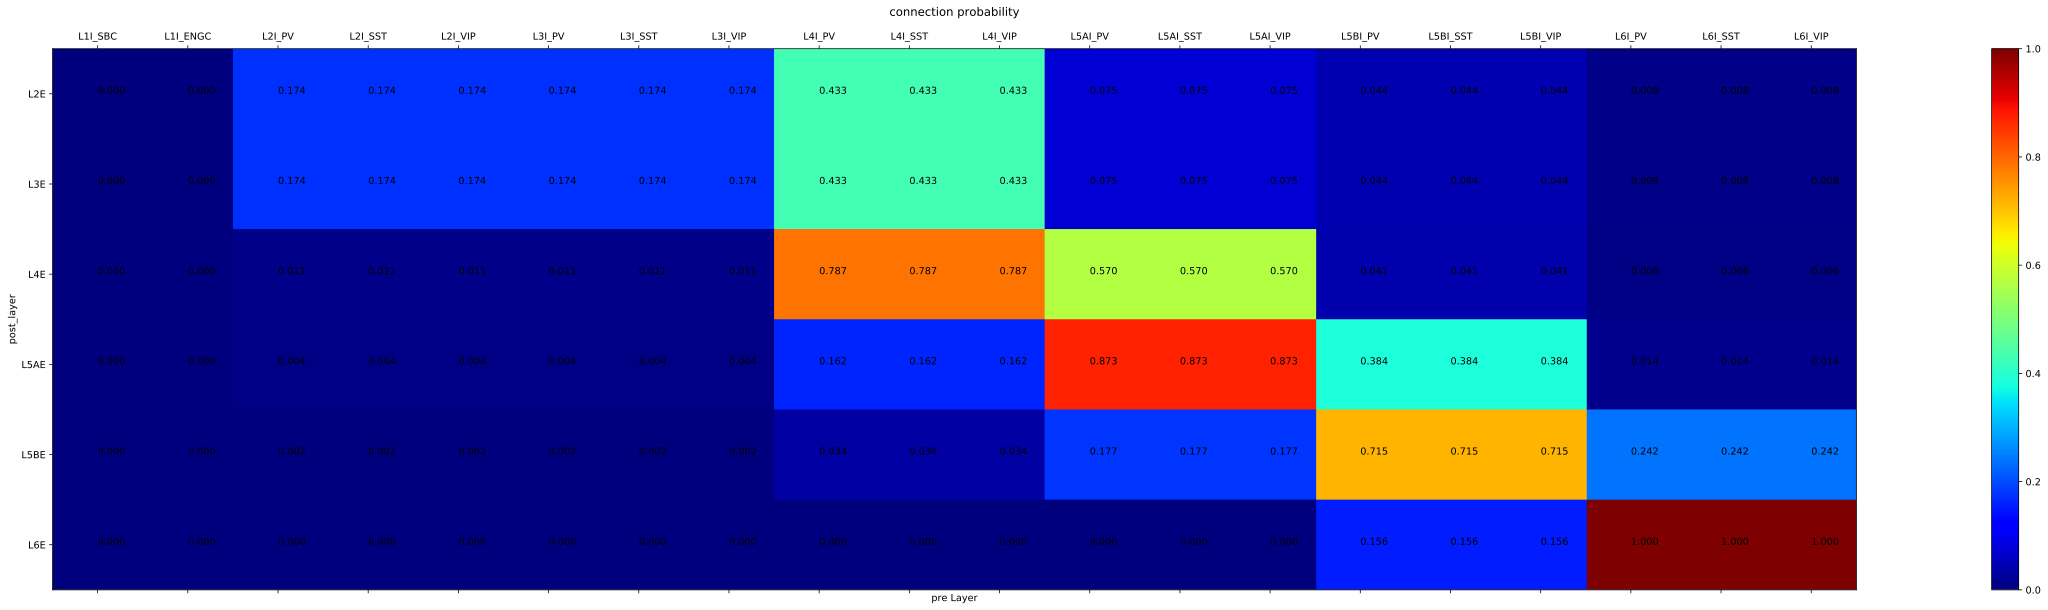

In [26]:
plt.figure(figsize=(50,10))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_I2E[:,:,0])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_I2E.shape[0]):
    for j in range (SubRegion_external_connection_matrix_I2E.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_I2E[i,j,0])
        
scale_ls_e = range(5)  
scale_ls_i = range(17) 
index_ls_e=['L2E','L3E',  'L5AE',  'L5BE', 'L6E']
index_ls_i=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L5AI_PV', 'L5AI_SST', 'L5AI_VIP', 'L5BI_PV', 'L5BI_SST' , 'L5BI_VIP' , 'L6I_PV', 'L6I_SST', 'L6I_VIP']
_ = plt.yticks(scale_ls_e, index_ls_e)
_ = plt.xticks(scale_ls_i, index_ls_i)        

plt.title('connection probability')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('output.png', dpi=300)

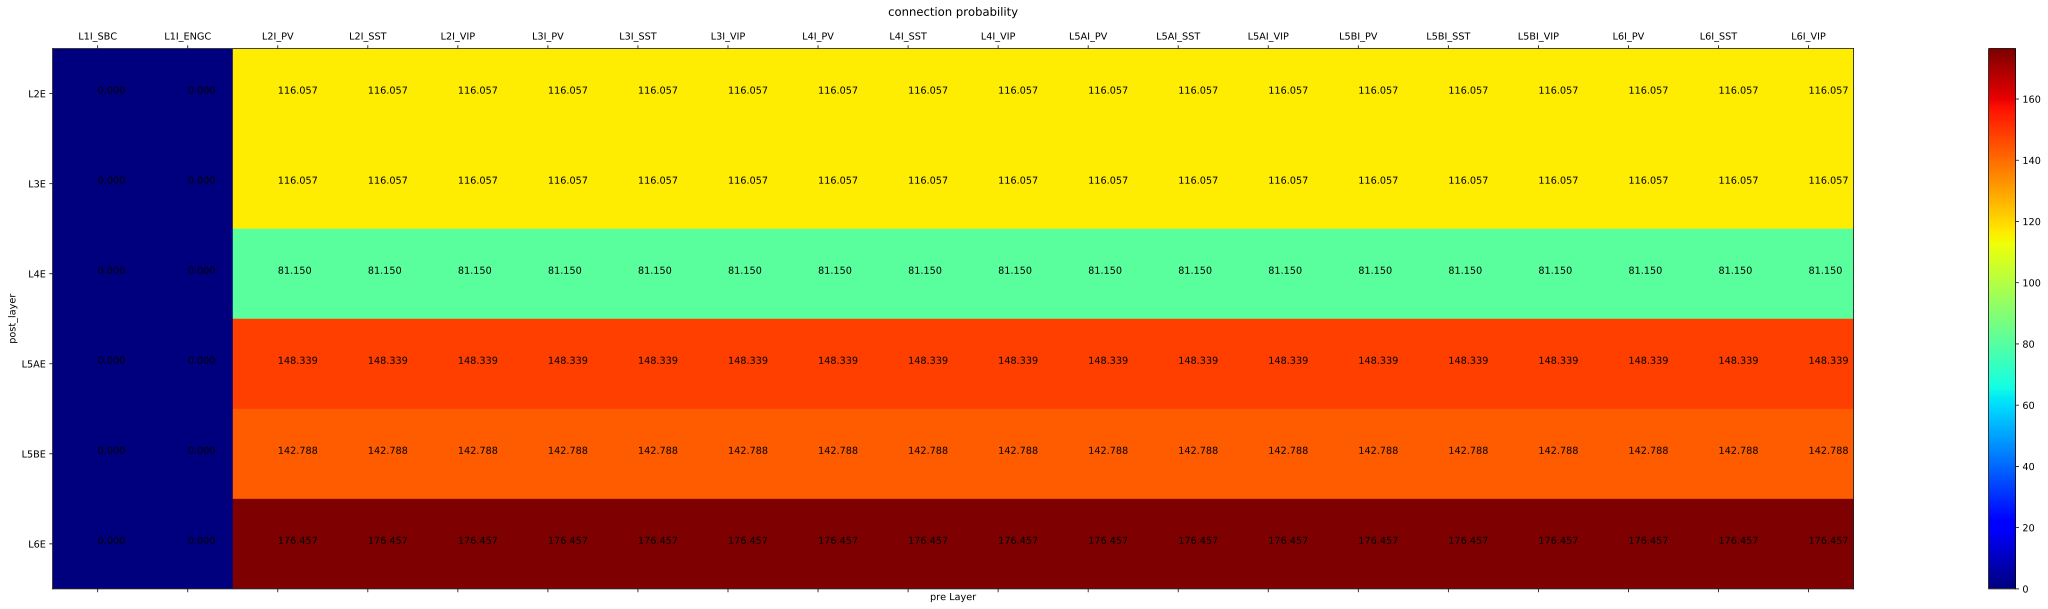

In [27]:
plt.figure(figsize=(50,10))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_I2E[:,:,1])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_I2E.shape[0]):
    for j in range (SubRegion_external_connection_matrix_I2E.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_I2E[i,j,1])
        
scale_ls_e = range(5)  
scale_ls_i = range(17) 
index_ls_e=['L2E','L3E',  'L5AE',  'L5BE', 'L6E']
index_ls_i=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L5AI_PV', 'L5AI_SST', 'L5AI_VIP', 'L5BI_PV', 'L5BI_SST' , 'L5BI_VIP' , 'L6I_PV', 'L6I_SST', 'L6I_VIP']
_ = plt.yticks(scale_ls_e, index_ls_e)
_ = plt.xticks(scale_ls_i, index_ls_i)        

plt.title('connection probability')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('output.png', dpi=300)

In [28]:
#E2I probability peak 
SubRegion_external_connection_matrix_E2I[:, 0, :2]=SubRegion_L1_connection_matrix_I2E[2:, 0]
SubRegion_external_connection_matrix_E2I[:, 1, :2]=SubRegion_L1_connection_matrix_I2E[2:, 1]

SubRegion_external_connection_matrix_E2I[0, 2:5, 0]=SubRegion_external_connection_matrix_E2E[0, 0, 0]
SubRegion_external_connection_matrix_E2I[1, 2:5, 0]=SubRegion_external_connection_matrix_E2E[1, 0, 0]
SubRegion_external_connection_matrix_E2I[2, 2:5, 0]=SubRegion_external_connection_matrix_E2E[2, 0, 0]
SubRegion_external_connection_matrix_E2I[3, 2:5, 0]=SubRegion_external_connection_matrix_E2E[3, 0, 0]
SubRegion_external_connection_matrix_E2I[4, 2:5, 0]=SubRegion_external_connection_matrix_E2E[4, 0, 0]
SubRegion_external_connection_matrix_E2I[5, 2:5, 0]=SubRegion_external_connection_matrix_E2E[5, 0, 0]

SubRegion_external_connection_matrix_E2I[0, 5:8, 0]=SubRegion_external_connection_matrix_E2E[0, 1, 0]
SubRegion_external_connection_matrix_E2I[1, 5:8, 0]=SubRegion_external_connection_matrix_E2E[1, 1, 0]
SubRegion_external_connection_matrix_E2I[2, 5:8, 0]=SubRegion_external_connection_matrix_E2E[2, 1, 0]
SubRegion_external_connection_matrix_E2I[3, 5:8, 0]=SubRegion_external_connection_matrix_E2E[3, 1, 0]
SubRegion_external_connection_matrix_E2I[4, 5:8, 0]=SubRegion_external_connection_matrix_E2E[4, 1, 0]
SubRegion_external_connection_matrix_E2I[5, 5:8, 0]=SubRegion_external_connection_matrix_E2E[5, 1, 0]

SubRegion_external_connection_matrix_E2I[0, 8:11, 0]=SubRegion_external_connection_matrix_E2E[0, 2, 0]
SubRegion_external_connection_matrix_E2I[1, 8:11, 0]=SubRegion_external_connection_matrix_E2E[1, 2, 0]
SubRegion_external_connection_matrix_E2I[2, 8:11, 0]=SubRegion_external_connection_matrix_E2E[2, 2, 0]
SubRegion_external_connection_matrix_E2I[3, 8:11, 0]=SubRegion_external_connection_matrix_E2E[3, 2, 0]
SubRegion_external_connection_matrix_E2I[4, 8:11, 0]=SubRegion_external_connection_matrix_E2E[4, 2, 0]
SubRegion_external_connection_matrix_E2I[5, 8:11, 0]=SubRegion_external_connection_matrix_E2E[5, 2, 0]

SubRegion_external_connection_matrix_E2I[0, 11:14, 0]=SubRegion_external_connection_matrix_E2E[0, 3, 0]
SubRegion_external_connection_matrix_E2I[1, 11:14, 0]=SubRegion_external_connection_matrix_E2E[1, 3, 0]
SubRegion_external_connection_matrix_E2I[2, 11:14, 0]=SubRegion_external_connection_matrix_E2E[2, 3, 0]
SubRegion_external_connection_matrix_E2I[3, 11:14, 0]=SubRegion_external_connection_matrix_E2E[3, 3, 0]
SubRegion_external_connection_matrix_E2I[4, 11:14, 0]=SubRegion_external_connection_matrix_E2E[4, 3, 0]
SubRegion_external_connection_matrix_E2I[5, 11:14, 0]=SubRegion_external_connection_matrix_E2E[5, 3, 0]

SubRegion_external_connection_matrix_E2I[0, 14:17, 0]=SubRegion_external_connection_matrix_E2E[0, 4, 0]
SubRegion_external_connection_matrix_E2I[1, 14:17, 0]=SubRegion_external_connection_matrix_E2E[1, 4, 0]
SubRegion_external_connection_matrix_E2I[2, 14:17, 0]=SubRegion_external_connection_matrix_E2E[2, 4, 0]
SubRegion_external_connection_matrix_E2I[3, 14:17, 0]=SubRegion_external_connection_matrix_E2E[3, 4, 0]
SubRegion_external_connection_matrix_E2I[4, 14:17, 0]=SubRegion_external_connection_matrix_E2E[4, 4, 0]
SubRegion_external_connection_matrix_E2I[5, 14:17, 0]=SubRegion_external_connection_matrix_E2E[5, 4, 0]

SubRegion_external_connection_matrix_E2I[0, 17:, 0]=SubRegion_external_connection_matrix_E2E[0, 5, 0]
SubRegion_external_connection_matrix_E2I[1, 17:, 0]=SubRegion_external_connection_matrix_E2E[1, 5, 0]
SubRegion_external_connection_matrix_E2I[2, 17:, 0]=SubRegion_external_connection_matrix_E2E[2, 5, 0]
SubRegion_external_connection_matrix_E2I[3, 17:, 0]=SubRegion_external_connection_matrix_E2E[3, 5, 0]
SubRegion_external_connection_matrix_E2I[4, 17:, 0]=SubRegion_external_connection_matrix_E2E[4, 5, 0]
SubRegion_external_connection_matrix_E2I[5, 17:, 0]=SubRegion_external_connection_matrix_E2E[5, 5, 0]

In [29]:
#E2I sigma
SubRegion_external_connection_matrix_E2I[0, 2:5, 1]=SubRegion_external_connection_matrix_E2E[0, 0, 1]
SubRegion_external_connection_matrix_E2I[1, 2:5, 1]=SubRegion_external_connection_matrix_E2E[1, 0, 1]
SubRegion_external_connection_matrix_E2I[2, 2:5, 1]=SubRegion_external_connection_matrix_E2E[2, 0, 1]
SubRegion_external_connection_matrix_E2I[3, 2:5, 1]=SubRegion_external_connection_matrix_E2E[3, 0, 1]
SubRegion_external_connection_matrix_E2I[4, 2:5, 1]=SubRegion_external_connection_matrix_E2E[4, 0, 1]
SubRegion_external_connection_matrix_E2I[5, 2:5, 1]=SubRegion_external_connection_matrix_E2E[5, 0, 1]

SubRegion_external_connection_matrix_E2I[0, 5:8, 1]=SubRegion_external_connection_matrix_E2E[0, 1, 1]
SubRegion_external_connection_matrix_E2I[1, 5:8, 1]=SubRegion_external_connection_matrix_E2E[1, 1, 1]
SubRegion_external_connection_matrix_E2I[2, 5:8, 1]=SubRegion_external_connection_matrix_E2E[2, 1, 1]
SubRegion_external_connection_matrix_E2I[3, 5:8, 1]=SubRegion_external_connection_matrix_E2E[3, 1, 1]
SubRegion_external_connection_matrix_E2I[4, 5:8, 1]=SubRegion_external_connection_matrix_E2E[4, 1, 1]
SubRegion_external_connection_matrix_E2I[5, 5:8, 1]=SubRegion_external_connection_matrix_E2E[5, 1, 1]

SubRegion_external_connection_matrix_E2I[0, 8:11, 1]=SubRegion_external_connection_matrix_E2E[0, 2, 1]
SubRegion_external_connection_matrix_E2I[1, 8:11, 1]=SubRegion_external_connection_matrix_E2E[1, 2, 1]
SubRegion_external_connection_matrix_E2I[2, 8:11, 1]=SubRegion_external_connection_matrix_E2E[2, 2, 1]
SubRegion_external_connection_matrix_E2I[3, 8:11, 1]=SubRegion_external_connection_matrix_E2E[3, 2, 1]
SubRegion_external_connection_matrix_E2I[4, 8:11, 1]=SubRegion_external_connection_matrix_E2E[4, 2, 1]
SubRegion_external_connection_matrix_E2I[5, 8:11, 1]=SubRegion_external_connection_matrix_E2E[5, 2, 1]

SubRegion_external_connection_matrix_E2I[0, 11:14, 1]=SubRegion_external_connection_matrix_E2E[0, 3, 1]
SubRegion_external_connection_matrix_E2I[1, 11:14, 1]=SubRegion_external_connection_matrix_E2E[1, 3, 1]
SubRegion_external_connection_matrix_E2I[2, 11:14, 1]=SubRegion_external_connection_matrix_E2E[2, 3, 1]
SubRegion_external_connection_matrix_E2I[3, 11:14, 1]=SubRegion_external_connection_matrix_E2E[3, 3, 1]
SubRegion_external_connection_matrix_E2I[4, 11:14, 1]=SubRegion_external_connection_matrix_E2E[4, 3, 1]
SubRegion_external_connection_matrix_E2I[5, 11:14, 1]=SubRegion_external_connection_matrix_E2E[5, 3, 1]

SubRegion_external_connection_matrix_E2I[0, 14:17, 1]=SubRegion_external_connection_matrix_E2E[0, 4, 1]
SubRegion_external_connection_matrix_E2I[1, 14:17, 1]=SubRegion_external_connection_matrix_E2E[1, 4, 1]
SubRegion_external_connection_matrix_E2I[2, 14:17, 1]=SubRegion_external_connection_matrix_E2E[2, 4, 1]
SubRegion_external_connection_matrix_E2I[3, 14:17, 1]=SubRegion_external_connection_matrix_E2E[3, 4, 1]
SubRegion_external_connection_matrix_E2I[4, 14:17, 1]=SubRegion_external_connection_matrix_E2E[4, 4, 1]
SubRegion_external_connection_matrix_E2I[5, 14:17, 1]=SubRegion_external_connection_matrix_E2E[5, 4, 1]

SubRegion_external_connection_matrix_E2I[0, 17:, 1]=SubRegion_external_connection_matrix_E2E[0, 5, 1]
SubRegion_external_connection_matrix_E2I[1, 17:, 1]=SubRegion_external_connection_matrix_E2E[1, 5, 1]
SubRegion_external_connection_matrix_E2I[2, 17:, 1]=SubRegion_external_connection_matrix_E2E[2, 5, 1]
SubRegion_external_connection_matrix_E2I[3, 17:, 1]=SubRegion_external_connection_matrix_E2E[3, 5, 1]
SubRegion_external_connection_matrix_E2I[4, 17:, 1]=SubRegion_external_connection_matrix_E2E[4, 5, 1]
SubRegion_external_connection_matrix_E2I[5, 17:, 1]=SubRegion_external_connection_matrix_E2E[5, 5, 1]

In [30]:
# I2I probability peak 
SubRegion_external_connection_matrix_I2I[:2, :2, :2]=SubRegion_L1_connection_matrix_I2I[:2, :2]

SubRegion_external_connection_matrix_I2I[2:5, 2:5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[7, 2]
SubRegion_external_connection_matrix_I2I[2:5, 5:8, 0]=M2_normalized_original_matrix_cell_density_canceled_out[7, 2]
SubRegion_external_connection_matrix_I2I[2:5, 8:11, 0]=M2_normalized_original_matrix_cell_density_canceled_out[13, 2]
SubRegion_external_connection_matrix_I2I[2:5, 11:14, 0]=M2_normalized_original_matrix_cell_density_canceled_out[19, 2]
SubRegion_external_connection_matrix_I2I[2:5, 14:17, 0]=M2_normalized_original_matrix_cell_density_canceled_out[25, 2]
SubRegion_external_connection_matrix_I2I[2:5, 17:, 0]=M2_normalized_original_matrix_cell_density_canceled_out[31, 2]

SubRegion_external_connection_matrix_I2I[5:8, 2:5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[7, 2]
SubRegion_external_connection_matrix_I2I[5:8, 5:8, 0]=M2_normalized_original_matrix_cell_density_canceled_out[7, 2]
SubRegion_external_connection_matrix_I2I[5:8, 8:11, 0]=M2_normalized_original_matrix_cell_density_canceled_out[13, 2]
SubRegion_external_connection_matrix_I2I[5:8, 11:14, 0]=M2_normalized_original_matrix_cell_density_canceled_out[19, 2]
SubRegion_external_connection_matrix_I2I[5:8, 14:17, 0]=M2_normalized_original_matrix_cell_density_canceled_out[25, 2]
SubRegion_external_connection_matrix_I2I[5:8, 17:, 0]=M2_normalized_original_matrix_cell_density_canceled_out[31, 2]

SubRegion_external_connection_matrix_I2I[8:11, 2:5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[8, 2]
SubRegion_external_connection_matrix_I2I[8:11, 5:8, 0]=M2_normalized_original_matrix_cell_density_canceled_out[8, 2]
SubRegion_external_connection_matrix_I2I[8:11, 8:11, 0]=M2_normalized_original_matrix_cell_density_canceled_out[14, 2]
SubRegion_external_connection_matrix_I2I[8:11, 11:14, 0]=M2_normalized_original_matrix_cell_density_canceled_out[20, 2]
SubRegion_external_connection_matrix_I2I[8:11, 14:17, 0]=M2_normalized_original_matrix_cell_density_canceled_out[26, 2]
SubRegion_external_connection_matrix_I2I[8:11, 17:, 0]=M2_normalized_original_matrix_cell_density_canceled_out[32, 2]

SubRegion_external_connection_matrix_I2I[11:14, 2:5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[9, 2]
SubRegion_external_connection_matrix_I2I[11:14, 5:8, 0]=M2_normalized_original_matrix_cell_density_canceled_out[9, 2]
SubRegion_external_connection_matrix_I2I[11:14, 8:11, 0]=M2_normalized_original_matrix_cell_density_canceled_out[15, 2]
SubRegion_external_connection_matrix_I2I[11:14, 11:14, 0]=M2_normalized_original_matrix_cell_density_canceled_out[21, 2]
SubRegion_external_connection_matrix_I2I[11:14, 14:17, 0]=M2_normalized_original_matrix_cell_density_canceled_out[27, 2]
SubRegion_external_connection_matrix_I2I[11:14, 17:, 0]=M2_normalized_original_matrix_cell_density_canceled_out[33, 2]

SubRegion_external_connection_matrix_I2I[14:17, 2:5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[10, 2]
SubRegion_external_connection_matrix_I2I[14:17, 5:8, 0]=M2_normalized_original_matrix_cell_density_canceled_out[10, 2]
SubRegion_external_connection_matrix_I2I[14:17, 8:11, 0]=M2_normalized_original_matrix_cell_density_canceled_out[16, 2]
SubRegion_external_connection_matrix_I2I[14:17, 11:14, 0]=M2_normalized_original_matrix_cell_density_canceled_out[22, 2]
SubRegion_external_connection_matrix_I2I[14:17, 14:17, 0]=M2_normalized_original_matrix_cell_density_canceled_out[28, 2]
SubRegion_external_connection_matrix_I2I[14:17, 17:, 0]=M2_normalized_original_matrix_cell_density_canceled_out[34, 2]

SubRegion_external_connection_matrix_I2I[17:, 2:5, 0]=M2_normalized_original_matrix_cell_density_canceled_out[11, 2]
SubRegion_external_connection_matrix_I2I[17:, 5:8, 0]=M2_normalized_original_matrix_cell_density_canceled_out[11, 2]
SubRegion_external_connection_matrix_I2I[17:, 8:11, 0]=M2_normalized_original_matrix_cell_density_canceled_out[17, 2]
SubRegion_external_connection_matrix_I2I[17:, 11:14, 0]=M2_normalized_original_matrix_cell_density_canceled_out[23, 2]
SubRegion_external_connection_matrix_I2I[17:, 14:17, 0]=M2_normalized_original_matrix_cell_density_canceled_out[29, 2]
SubRegion_external_connection_matrix_I2I[17:, 17:, 0]=M2_normalized_original_matrix_cell_density_canceled_out[35, 2]
SubRegion_external_connection_matrix_I2I

array([[[  8.68902439e-02,   3.43224612e+01],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00]],

       [[  8.38414634e-01,   1.16056761e+02],
        [  1.00000000e+00,   1.1

In [31]:
# I2I sigma
SubRegion_external_connection_matrix_I2I[2:5,2:,1]=M2_fitted_model_coefficients[0,2]
SubRegion_external_connection_matrix_I2I[5:8,2:,1]=M2_fitted_model_coefficients[0,2]
SubRegion_external_connection_matrix_I2I[8:11,2:,1]=M2_fitted_model_coefficients[1,2]
SubRegion_external_connection_matrix_I2I[11:14,2:,1]=M2_fitted_model_coefficients[2,2]
SubRegion_external_connection_matrix_I2I[14:17,2:,1]=M2_fitted_model_coefficients[3,2]
SubRegion_external_connection_matrix_I2I[17:,2:,1]=M2_fitted_model_coefficients[4,2]
SubRegion_external_connection_matrix_I2I.shape

(20, 20, 2)

In [32]:
#from xu , excitatory input
# row L23 L5A L5B L6
#column py FS MC+ MC- IS RS BS Bipolar Chandellier
##Excitatory_Input_matrix=np.transpose(pd.read_csv('Xu2009/Excitatory_Input.csv').values)
##Inhibitory_Input_matrix=np.transpose(pd.read_csv('Xu2009/Inhibitory_Input.csv').values)
print (Excitatory_Input_matrix.shape)
print (Excitatory_Input_matrix)
print (Inhibitory_Input_matrix.shape)
print (Inhibitory_Input_matrix)

(5, 9)
[[ 5.93  7.07  4.86  3.18  2.5   2.72  3.31  4.22  3.05]
 [ 7.53  1.83  3.88  1.05  1.29  0.62  3.26  1.96  1.41]
 [ 2.55  0.77  0.87  2.58  2.76  0.53  1.05  3.36  1.85]
 [ 1.93  0.4   0.51  0.5   1.18  0.29  0.79  1.15  0.77]
 [ 0.15 -0.01  0.38  0.16  0.16  0.1   0.2   0.29  0.1 ]]
(6, 9)
[[ 0.75  1.46  0.18  1.61  0.91  1.37  0.95  1.88  1.19]
 [ 4.25  4.46  3.54  3.09  3.69  2.79  4.23  4.45  3.53]
 [ 3.01  2.85  4.29  0.23  0.89  0.39  3.11 -0.17  0.26]
 [-0.04  1.66  3.17  1.31  0.76  0.57  3.42 -0.63 -0.15]
 [ 0.07  1.81  1.31  1.38  0.64  0.78  2.69  0.78  0.14]
 [ 0.53  0.74  0.47  0.55  0.41  0.44  0.5   0.57  0.62]]


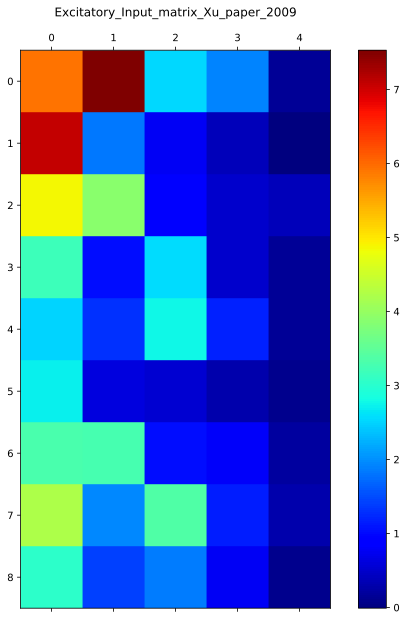

In [33]:
plt.figure(figsize=(10,10))
plt.matshow(np.transpose(np.squeeze(Excitatory_Input_matrix)), fignum=1, cmap=plt.cm.jet)
plt.colorbar()
##plt.title('Excitatory_Input_matrix_Xu_paper_2009')

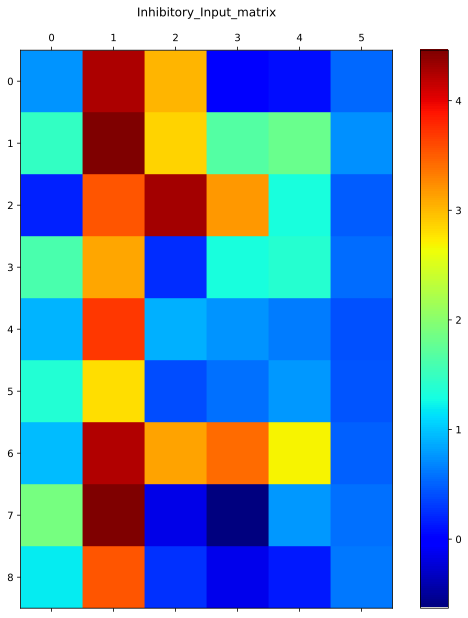

In [34]:
plt.figure(figsize=(10,10))
plt.matshow(np.transpose(np.squeeze(Inhibitory_Input_matrix)), fignum=1, cmap=plt.cm.jet)
plt.colorbar()
##plt.title('Inhibitory_Input_matrix')

In [35]:
E_L23I=np.sum(Excitatory_Input_matrix[:, 1:], axis=1)
I_L23I=np.sum(Inhibitory_Input_matrix[1:, 1:], axis=1)

IN_AllNeuron_ratio=np.array([0.132575, 0.081,0.199, 0.162,0.096])
All_neurons=np.array([19952.406,21268.353,5631.072,14903.491,27734.670])
cells_excitatory=All_neurons*(1-IN_AllNeuron_ratio)
cells_inhibitory=All_neurons*IN_AllNeuron_ratio
E_L23I=E_L23I/cells_excitatory
I_L23I=E_L23I/cells_inhibitory
print (E_L23I)
print (I_L23I)


[  1.78596028e-03   7.82784215e-04   3.05288429e-03   4.47589386e-04
   5.50411695e-05]
[  6.75172722e-07   4.54384157e-07   2.72437061e-06   1.85385924e-07
   2.06725198e-08]


In [36]:
SubRegion_external_connection_matrix_E2I_L23_max=np.max(SubRegion_external_connection_matrix_E2I[:, 2:8, 0])
SubRegion_external_connection_matrix_E2I[0, 2:8, 0]=(E_L23I[0]-np.min(E_L23I))*SubRegion_external_connection_matrix_E2I_L23_max/(np.max(E_L23I)-np.min(E_L23I))
SubRegion_external_connection_matrix_E2I[1, 2:8, 0]=(E_L23I[0]-np.min(E_L23I))*SubRegion_external_connection_matrix_E2I_L23_max/(np.max(E_L23I)-np.min(E_L23I))
SubRegion_external_connection_matrix_E2I[2, 2:8, 0]=(E_L23I[1]-np.min(E_L23I))*SubRegion_external_connection_matrix_E2I_L23_max/(np.max(E_L23I)-np.min(E_L23I))
SubRegion_external_connection_matrix_E2I[3, 2:8, 0]=(E_L23I[2]-np.min(E_L23I))*SubRegion_external_connection_matrix_E2I_L23_max/(np.max(E_L23I)-np.min(E_L23I))
SubRegion_external_connection_matrix_E2I[4, 2:8, 0]=(E_L23I[3]-np.min(E_L23I))*SubRegion_external_connection_matrix_E2I_L23_max/(np.max(E_L23I)-np.min(E_L23I))
SubRegion_external_connection_matrix_E2I[5, 2:8, 0]=(E_L23I[4]-np.min(E_L23I))*SubRegion_external_connection_matrix_E2I_L23_max/(np.max(E_L23I)-np.min(E_L23I))

SubRegion_external_connection_matrix_I2I_L23_max=np.max(SubRegion_external_connection_matrix_I2I[:, 2:8, 0])
SubRegion_external_connection_matrix_I2I[2:8, 2:8, 0]=(I_L23I[0]-np.min(I_L23I))*SubRegion_external_connection_matrix_I2I_L23_max/(np.max(I_L23I)-np.min(I_L23I))
SubRegion_external_connection_matrix_I2I[8:11, 2:8, 0]=(I_L23I[1]-np.min(I_L23I))*SubRegion_external_connection_matrix_I2I_L23_max/(np.max(I_L23I)-np.min(I_L23I))
SubRegion_external_connection_matrix_I2I[11:14, 2:8, 0]=(I_L23I[2]-np.min(I_L23I))*SubRegion_external_connection_matrix_I2I_L23_max/(np.max(I_L23I)-np.min(I_L23I))
SubRegion_external_connection_matrix_I2I[14:17, 2:8, 0]=(I_L23I[3]-np.min(I_L23I))*SubRegion_external_connection_matrix_I2I_L23_max/(np.max(I_L23I)-np.min(I_L23I))
SubRegion_external_connection_matrix_I2I[17:, 2:8, 0]=(I_L23I[4]-np.min(I_L23I))*SubRegion_external_connection_matrix_I2I_L23_max/(np.max(I_L23I)-np.min(I_L23I))
                                                                                                                                              

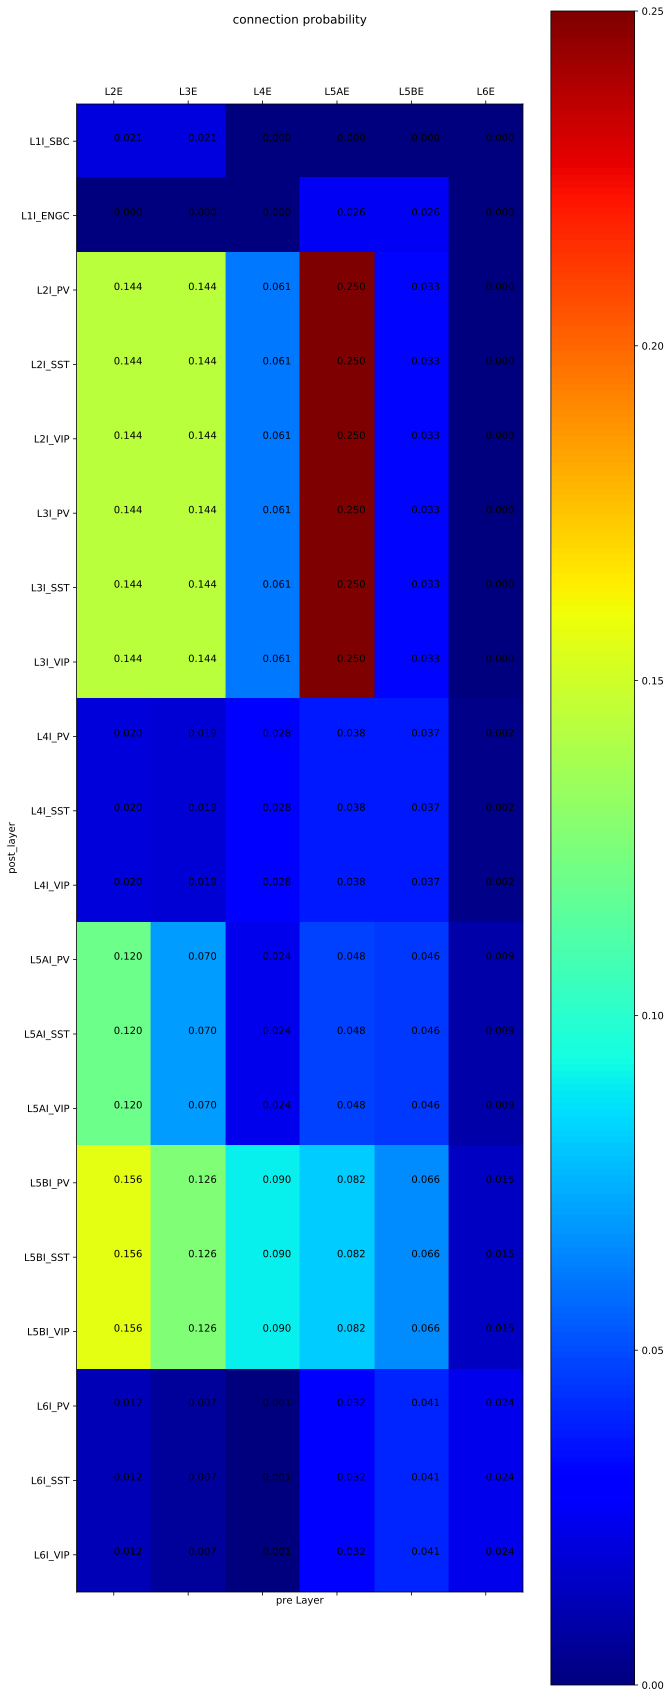

In [37]:
plt.figure(figsize=(10,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_E2I[:,:,0])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_E2I.shape[0]):
    for j in range (SubRegion_external_connection_matrix_E2I.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_E2I[i,j,0])
        
scale_ls_e = range(5)  
scale_ls_i = range(17) 
index_ls_e=['L2E','L3E',  'L5AE',  'L5BE', 'L6E']
index_ls_i=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L5AI_PV', 'L5AI_SST', 'L5AI_VIP', 'L5BI_PV', 'L5BI_SST' , 'L5BI_VIP' , 'L6I_PV', 'L6I_SST', 'L6I_VIP']
_ = plt.yticks(scale_ls_i, index_ls_i)
_ = plt.xticks(scale_ls_e, index_ls_e)        

plt.title('connection probability')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('output.png', dpi=300)

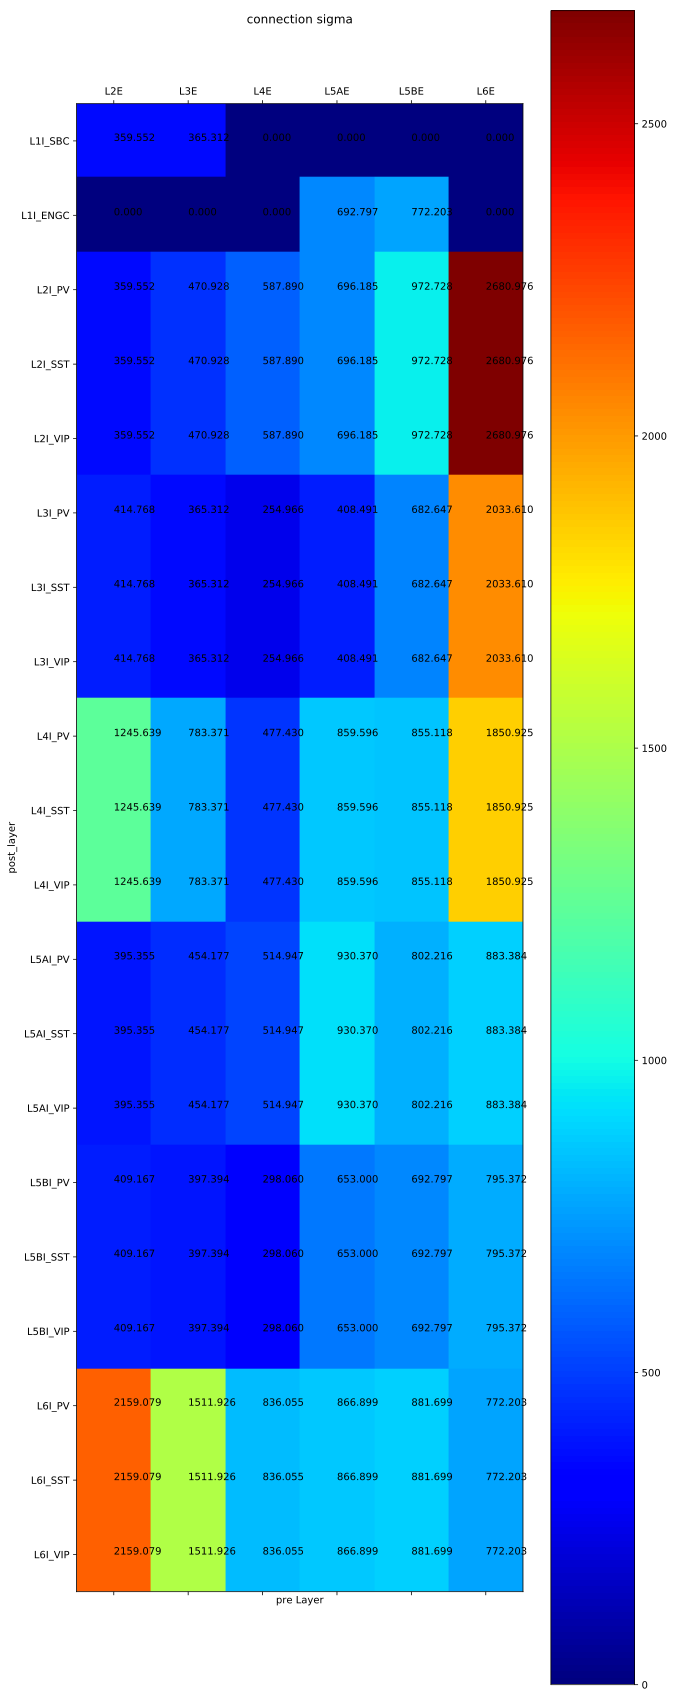

In [38]:
plt.figure(figsize=(10,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_E2I[:,:,1])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_E2I.shape[0]):
    for j in range (SubRegion_external_connection_matrix_E2I.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_E2I[i,j,1])
        
scale_ls_e = range(5)  
scale_ls_i = range(17) 
index_ls_e=['L2E','L3E',  'L5AE',  'L5BE', 'L6E']
index_ls_i=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L5AI_PV', 'L5AI_SST', 'L5AI_VIP', 'L5BI_PV', 'L5BI_SST' , 'L5BI_VIP' , 'L6I_PV', 'L6I_SST', 'L6I_VIP']
_ = plt.yticks(scale_ls_i, index_ls_i)
_ = plt.xticks(scale_ls_e, index_ls_e)        

plt.title('connection sigma')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('output.png', dpi=300)

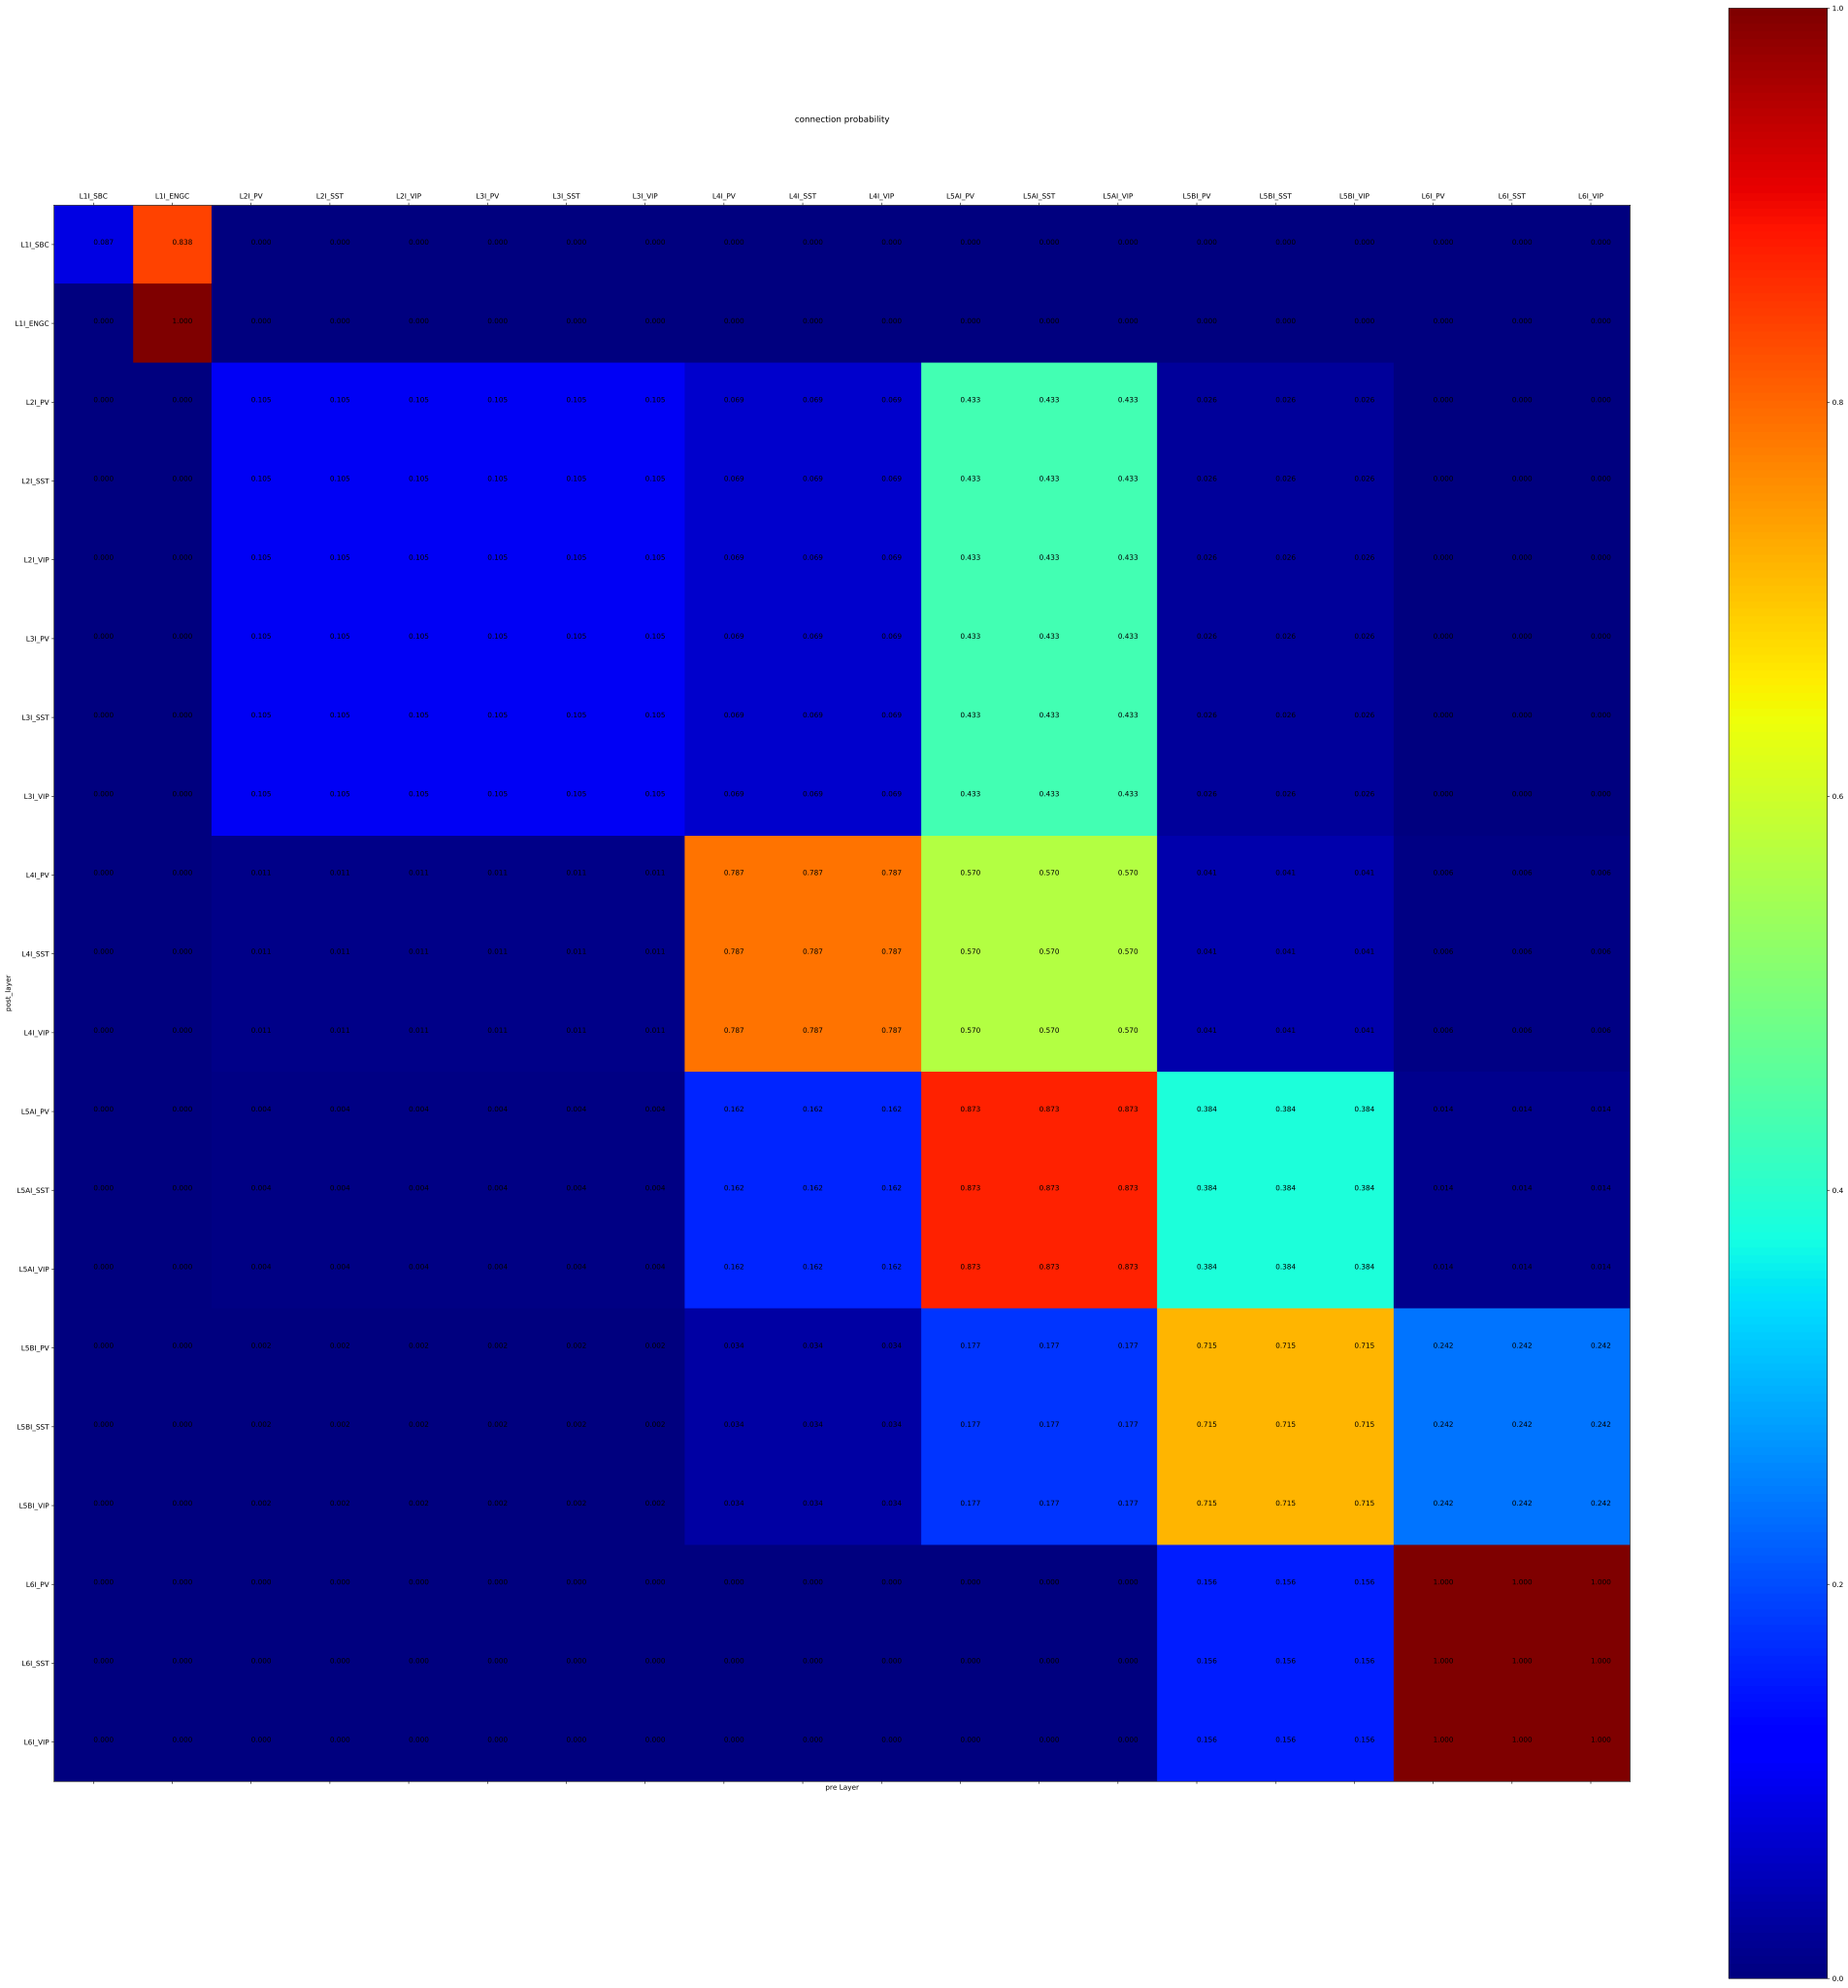

In [39]:
plt.figure(figsize=(50,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_I2I[:,:,0])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_I2I.shape[0]):
    for j in range (SubRegion_external_connection_matrix_I2I.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_I2I[i,j,0])
        
scale_ls_e = range(5)  
scale_ls_i = range(17) 
index_ls_e=['L2E','L3E',  'L5AE',  'L5BE', 'L6E']
index_ls_i=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L5AI_PV', 'L5AI_SST', 'L5AI_VIP', 'L5BI_PV', 'L5BI_SST' , 'L5BI_VIP' , 'L6I_PV', 'L6I_SST', 'L6I_VIP']
_ = plt.yticks(scale_ls_i, index_ls_i)
_ = plt.xticks(scale_ls_i, index_ls_i)        

plt.title('connection probability')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('output.png', dpi=300)

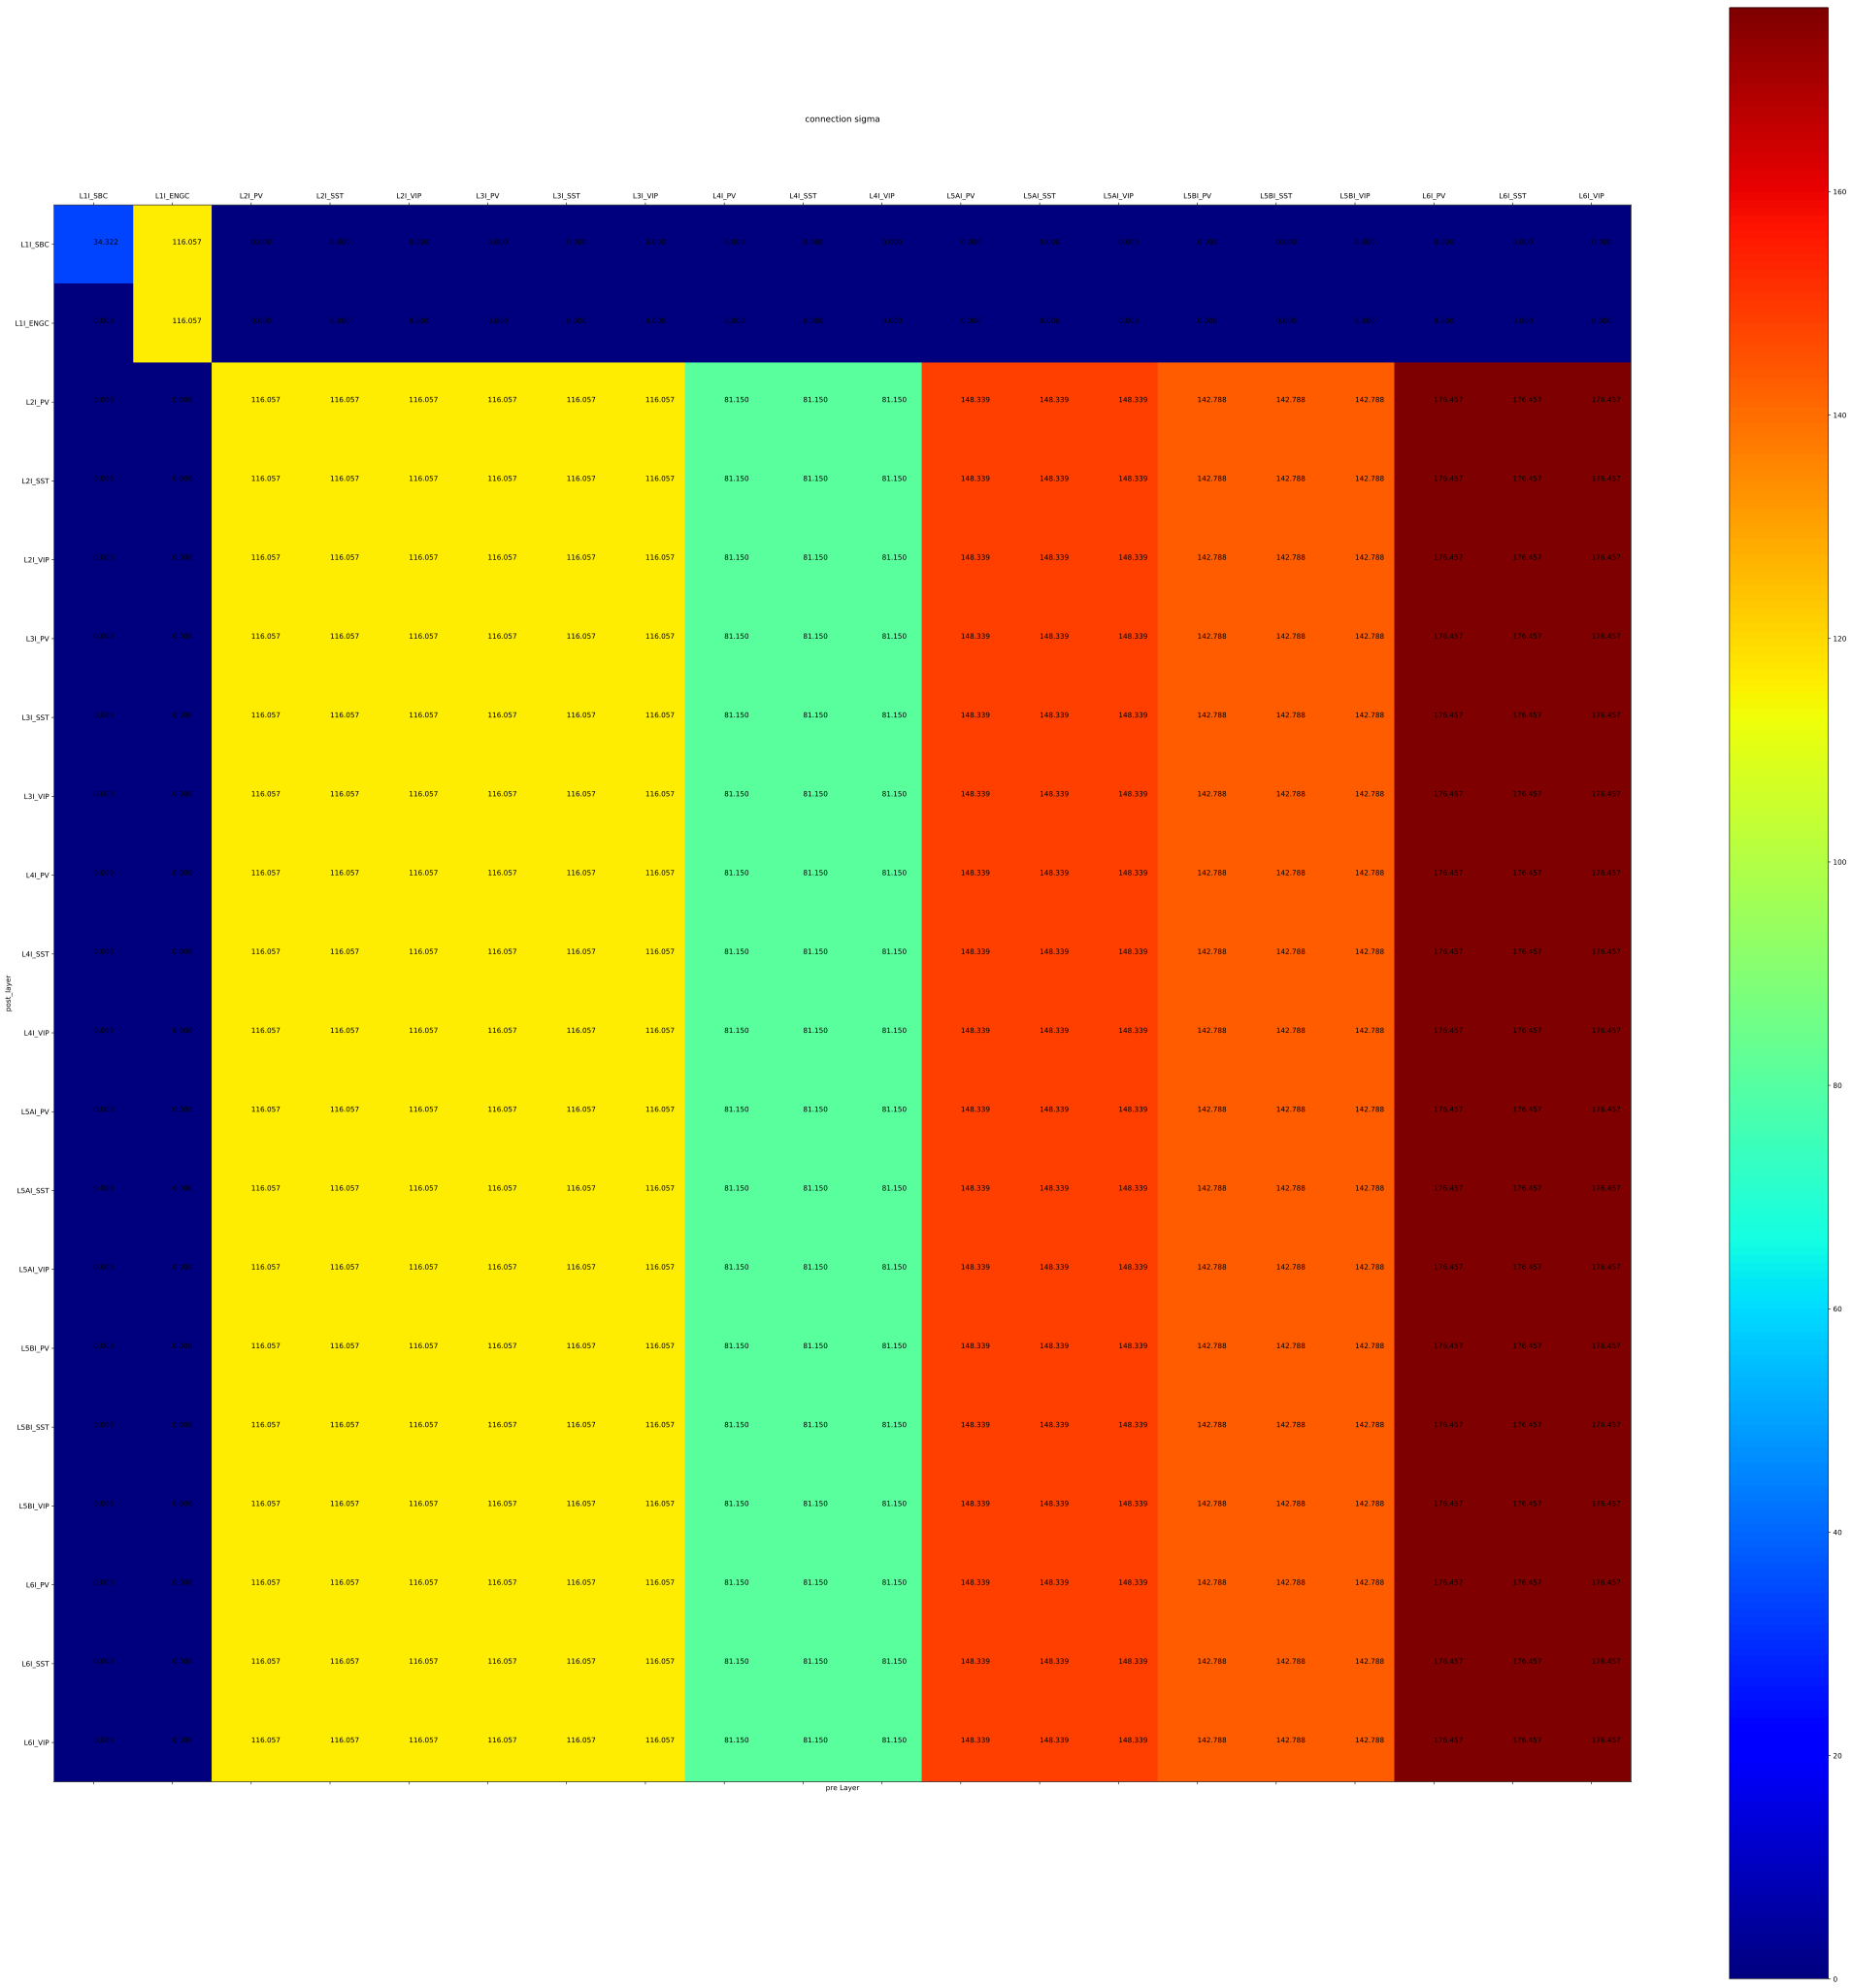

In [40]:
plt.figure(figsize=(50,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_I2I[:,:,1])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_I2I.shape[0]):
    for j in range (SubRegion_external_connection_matrix_I2I.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_I2I[i,j,1])
        
scale_ls_e = range(5)  
scale_ls_i = range(17) 
index_ls_e=['L2E','L3E',  'L5AE',  'L5BE', 'L6E']
index_ls_i=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L5AI_PV', 'L5AI_SST', 'L5AI_VIP', 'L5BI_PV', 'L5BI_SST' , 'L5BI_VIP' , 'L6I_PV', 'L6I_SST', 'L6I_VIP']
_ = plt.yticks(scale_ls_i, index_ls_i)
_ = plt.xticks(scale_ls_i, index_ls_i)       

plt.title('connection sigma')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('output.png', dpi=300)

In [41]:
np.savez('SubRegion_external_connection_matrix',SubRegion_external_connection_matrix_E2E=SubRegion_external_connection_matrix_E2E, SubRegion_external_connection_matrix_I2E=SubRegion_external_connection_matrix_I2E, SubRegion_external_connection_matrix_E2I=SubRegion_external_connection_matrix_E2I, SubRegion_external_connection_matrix_I2I=SubRegion_external_connection_matrix_I2I, SubRegion_L1_connection_matrix_I2I=SubRegion_L1_connection_matrix_I2I, SubRegion_L1_connection_matrix_I2E=SubRegion_L1_connection_matrix_I2E)

In [42]:
#axis 2, index 0 is the weight and index 1 is the delay 

SubRegion_external_weight_delay_E2E=np.zeros((6,6,2))
SubRegion_external_weight_delay_I2E=np.zeros((20,6,2))
SubRegion_external_weight_delay_E2I=np.zeros((6,20,2))
SubRegion_external_weight_delay_I2I=np.zeros((20,20,2))

In [43]:
# fix all delay value as 1.5 ms
SubRegion_external_weight_delay_E2E[:, :, 1]=1.5
SubRegion_external_weight_delay_I2E[:, :, 1]=1.5
SubRegion_external_weight_delay_E2I[:, :, 1]=1.5
SubRegion_external_weight_delay_I2I[:, :, 1]=1.5

In [44]:
# From L1 SBC ENGC to other neurons' inputsun
SubRegion_external_weight_delay_E2E[:, :, 0]=0.37
SubRegion_external_weight_delay_I2E[2:, :, 0]=-1.0
SubRegion_external_weight_delay_I2E[0, :, 0]=0.
SubRegion_external_weight_delay_I2I[0, :, 0]=-0.8

SubRegion_external_weight_delay_I2E[1, :, 0]=-1.
SubRegion_external_weight_delay_I2I[1, :, 0]=-1.

SubRegion_external_weight_delay_I2I[[3, 6, 9, 12, 15, 18], 0, 0]=-0.8
SubRegion_external_weight_delay_I2I[[3, 6, 9, 12, 15, 18], 1, 0]=-0.8

#SubRegion_external_weight_delay_E2I[:, :, 0]=1.0
#SubRegion_external_weight_delay_I2I[:, :, 0]=1.0

In [45]:
SubRegion_external_weight_delay_E2I[:, [2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19], 0]=0.82
SubRegion_external_weight_delay_E2I[:, [3, 6, 9, 12, 15, 18], 0]=0.39

In [46]:
#SubRegion_external_weight_delay_I2I[[2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19], [2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19], 0]=-1.12
#SubRegion_external_weight_delay_I2I[[3, 6, 9, 12, 15, 18], [2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19], 0]=-0.74

for i in [2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]:
    for j in [2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]:
        SubRegion_external_weight_delay_I2I[i, j, 0]=-1.12

for i in [3, 6, 9, 12, 15, 18]:
    for j in [2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]:
        SubRegion_external_weight_delay_I2I[i, j, 0]=-0.74

In [47]:
np.savez('SubRegion_external_weight_delay_matrix',SubRegion_external_weight_delay_E2E=SubRegion_external_weight_delay_E2E,SubRegion_external_weight_delay_I2E=SubRegion_external_weight_delay_I2E,SubRegion_external_weight_delay_E2I=SubRegion_external_weight_delay_E2I,SubRegion_external_weight_delay_I2I=SubRegion_external_weight_delay_I2I)

In [48]:
print (SubRegion_external_weight_delay_I2E[:, :, 0])


[[ 0.  0.  0.  0.  0.  0.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]]
